In [1]:
from matplotlib import pyplot as plt
from IPython import display
from time import sleep
import random
from collections import deque

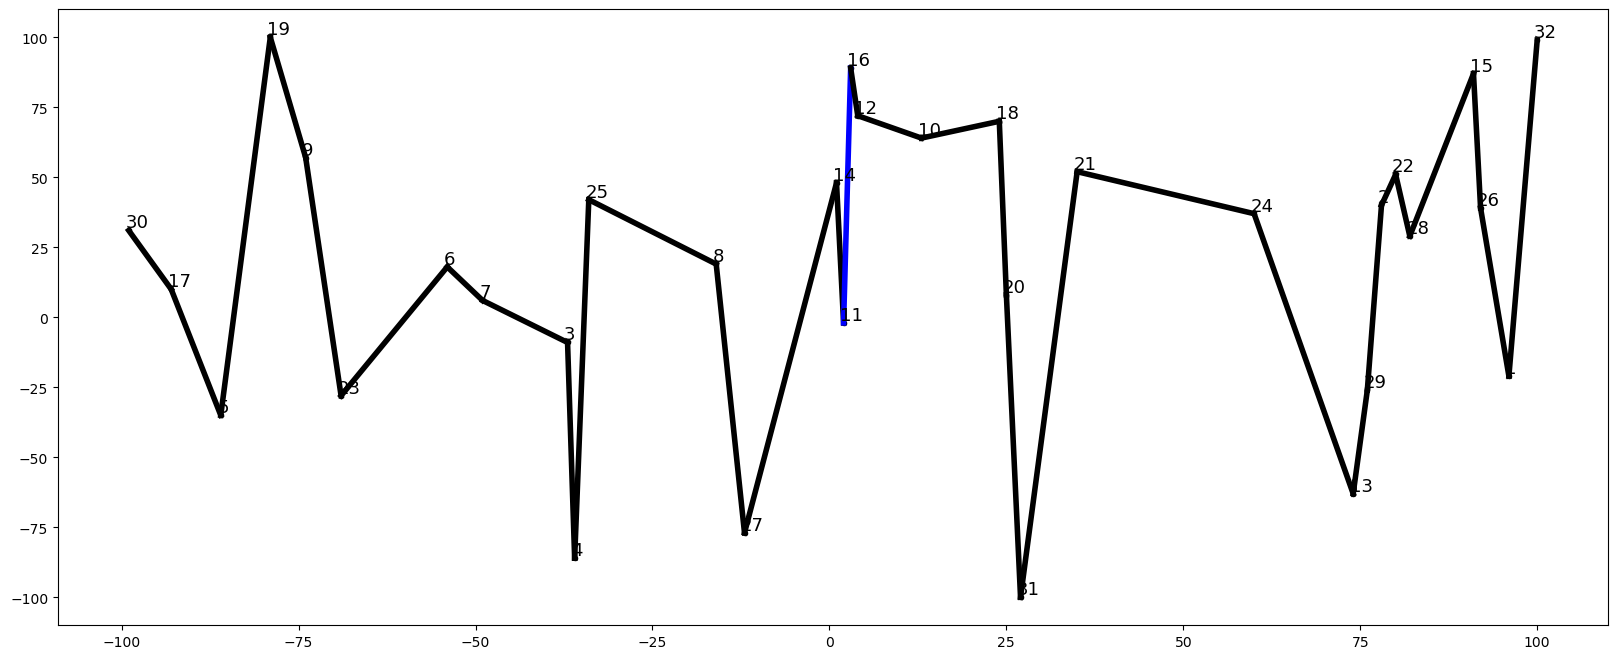

11 16


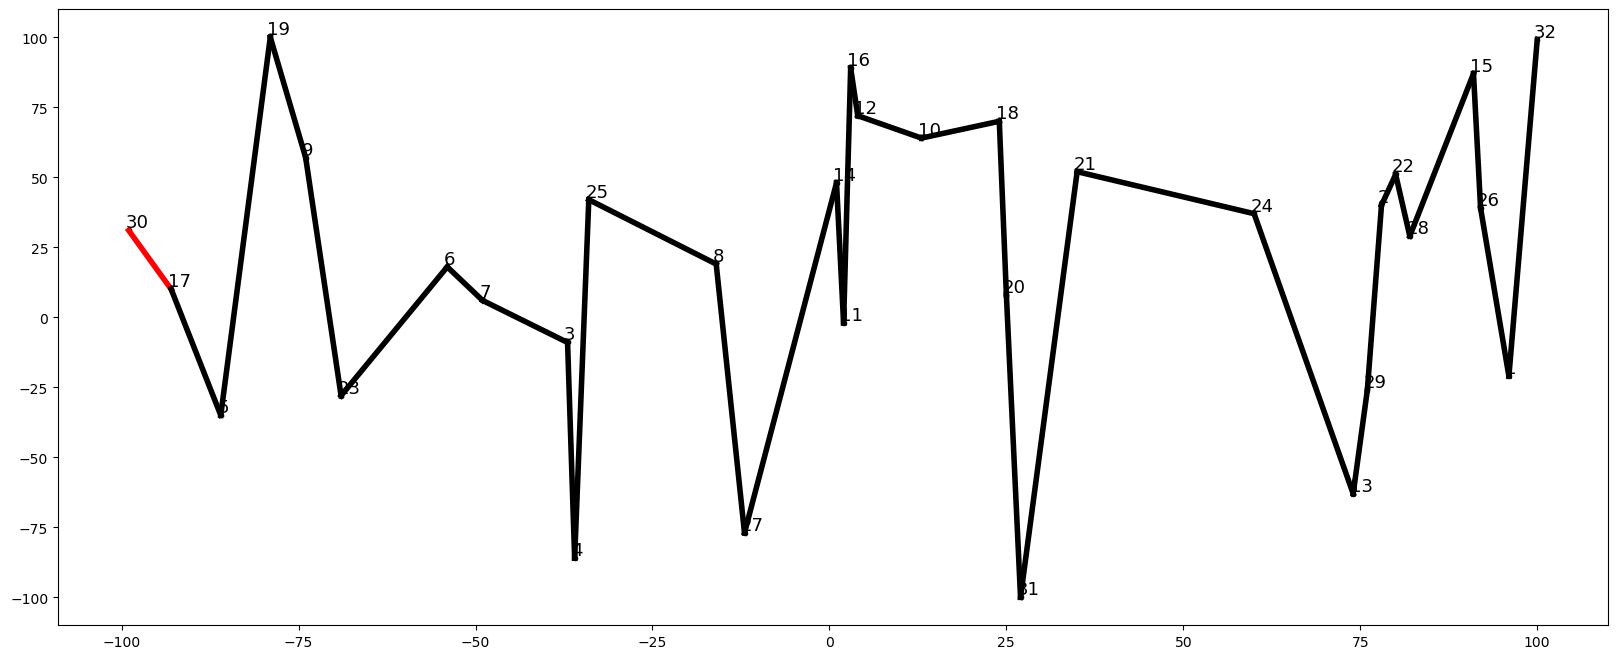

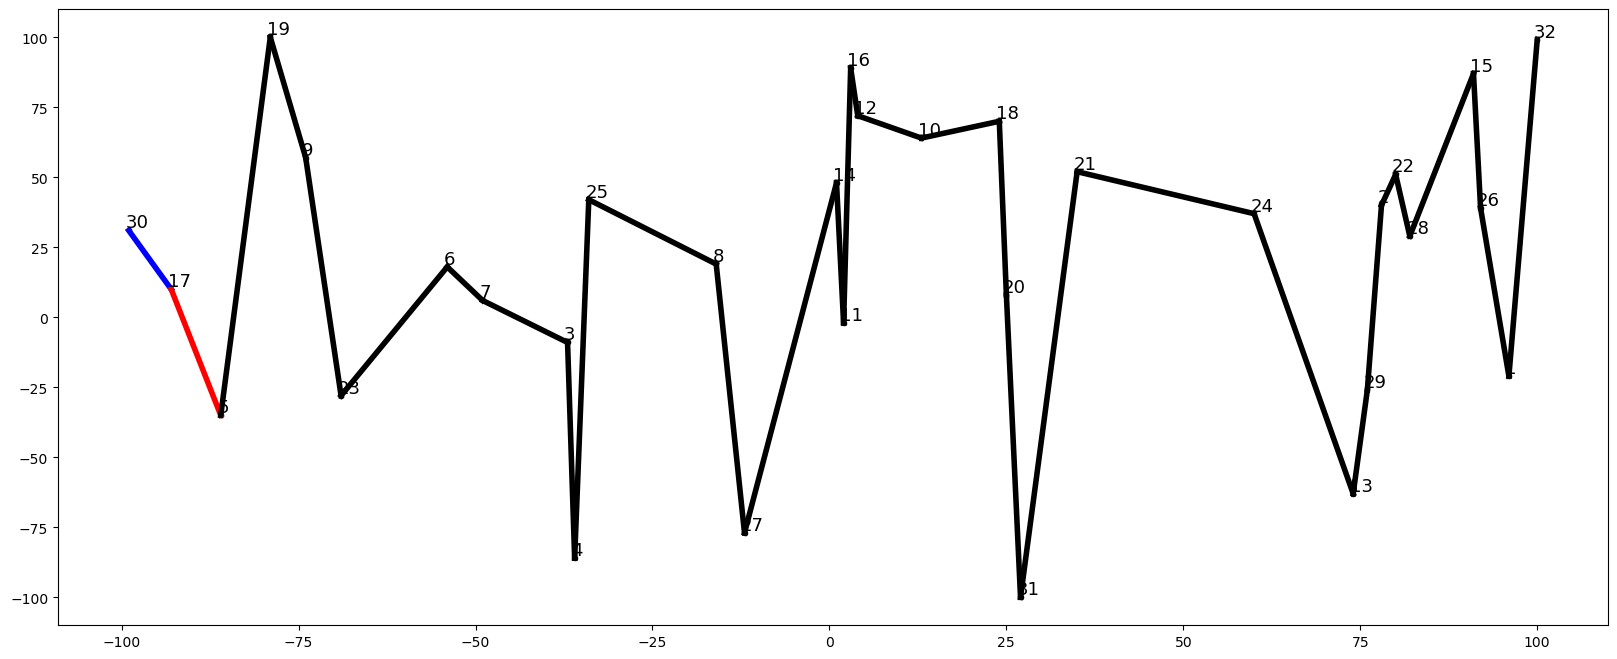

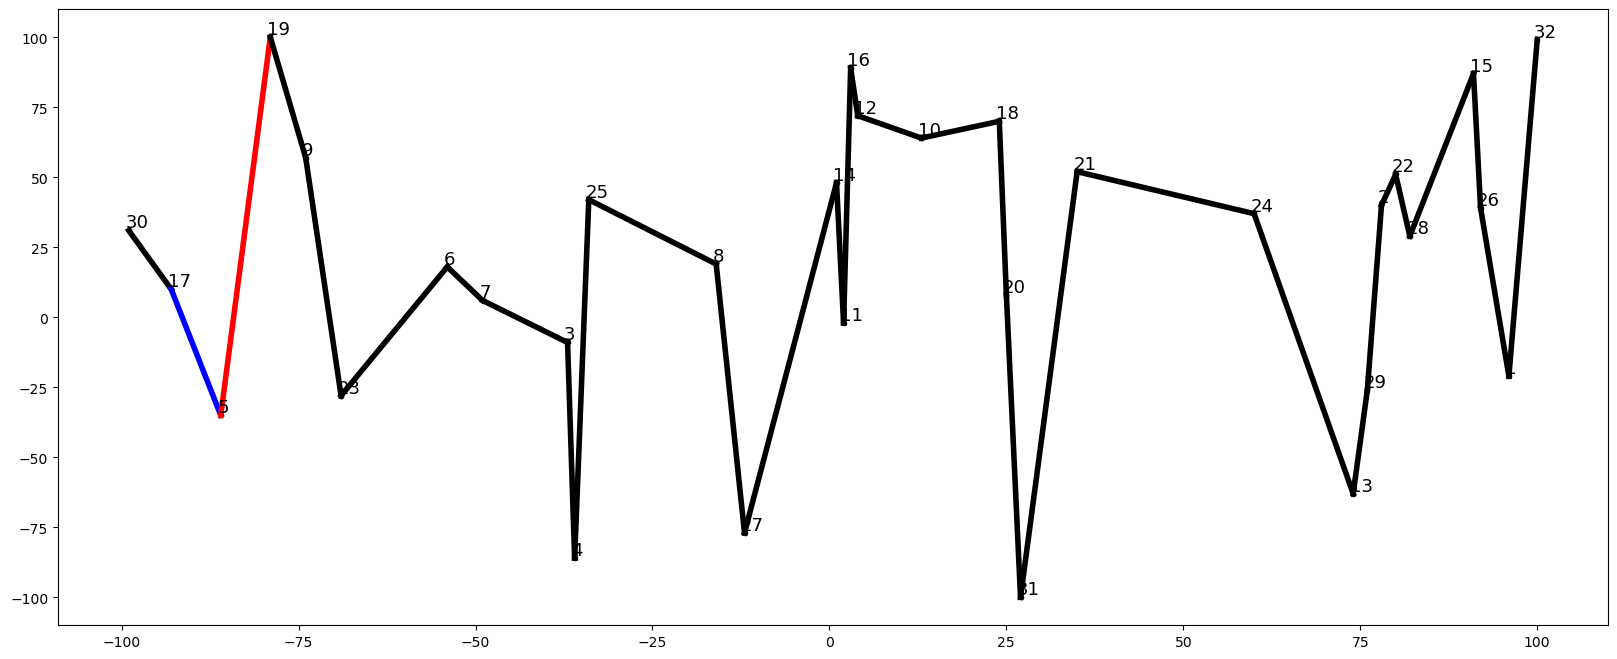

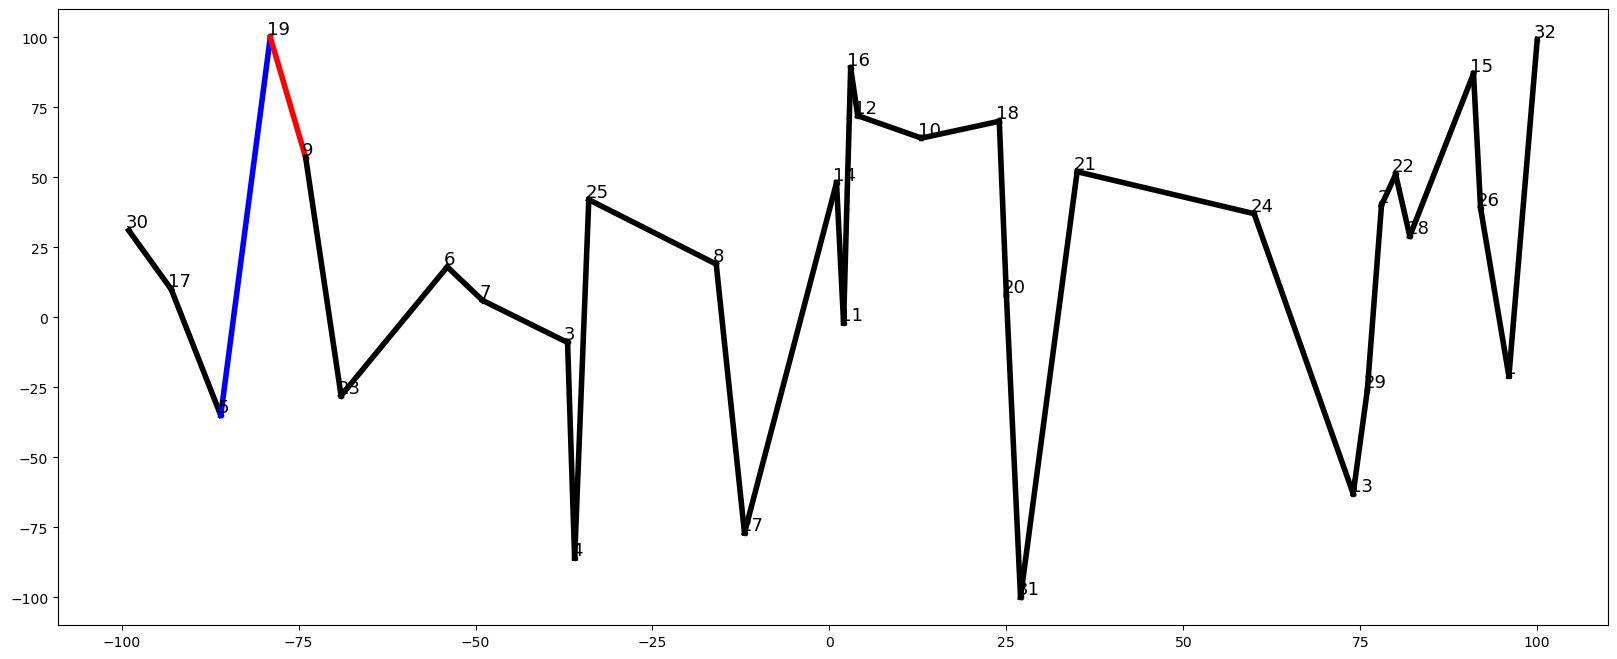

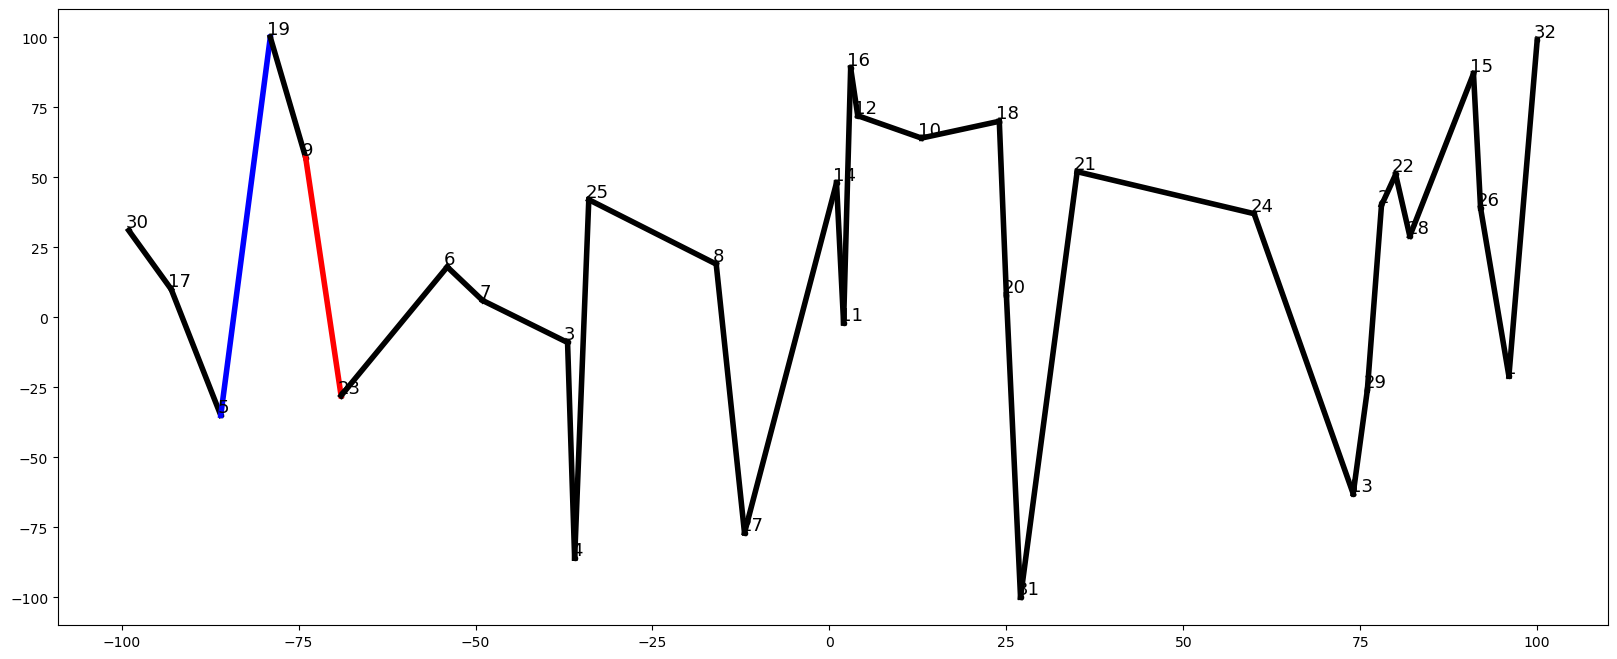

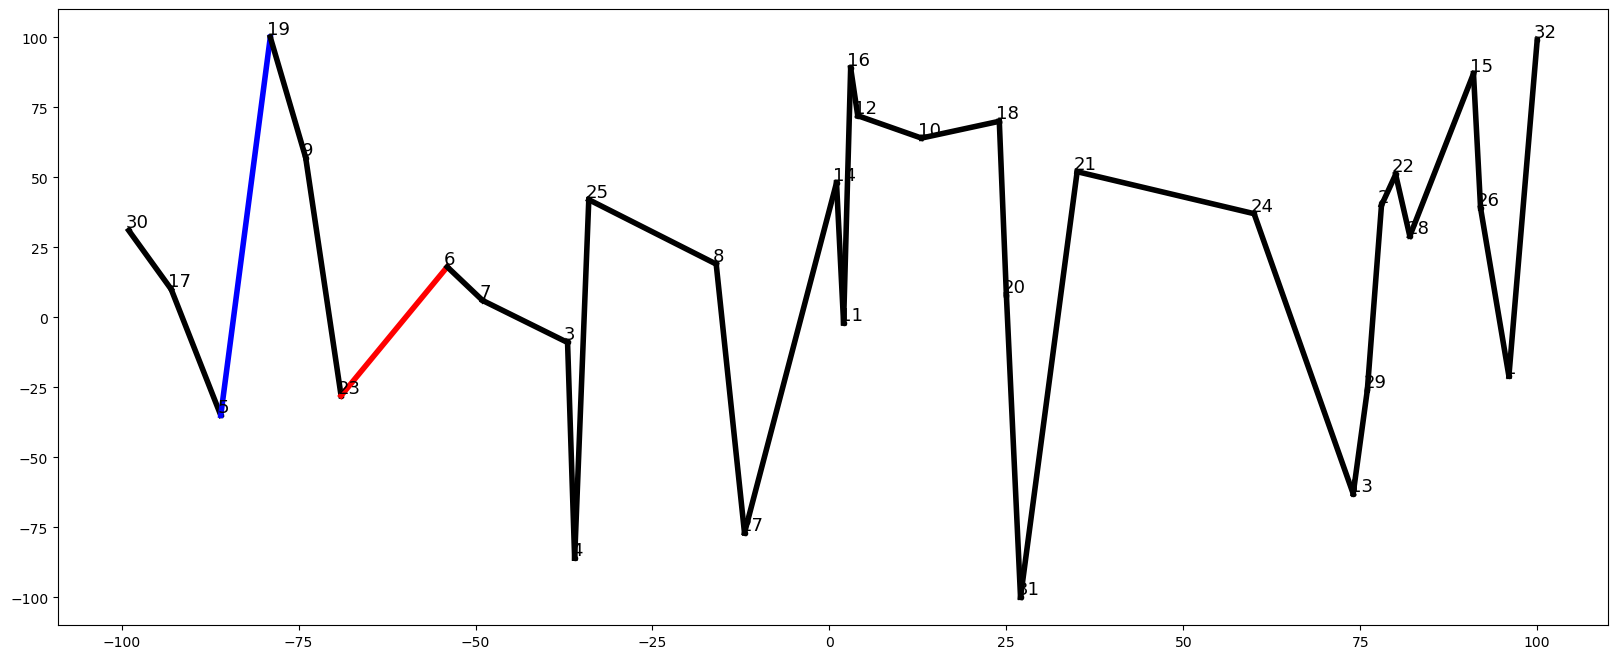

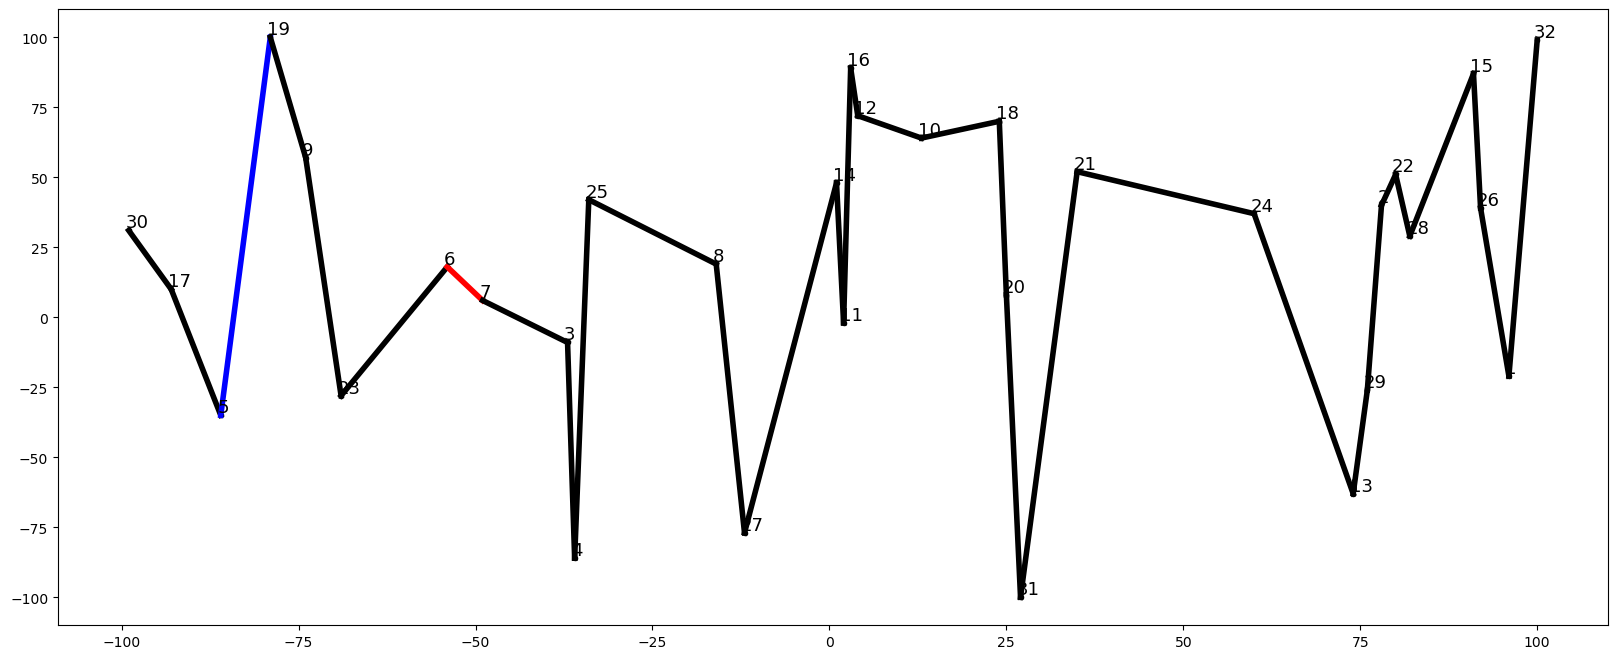

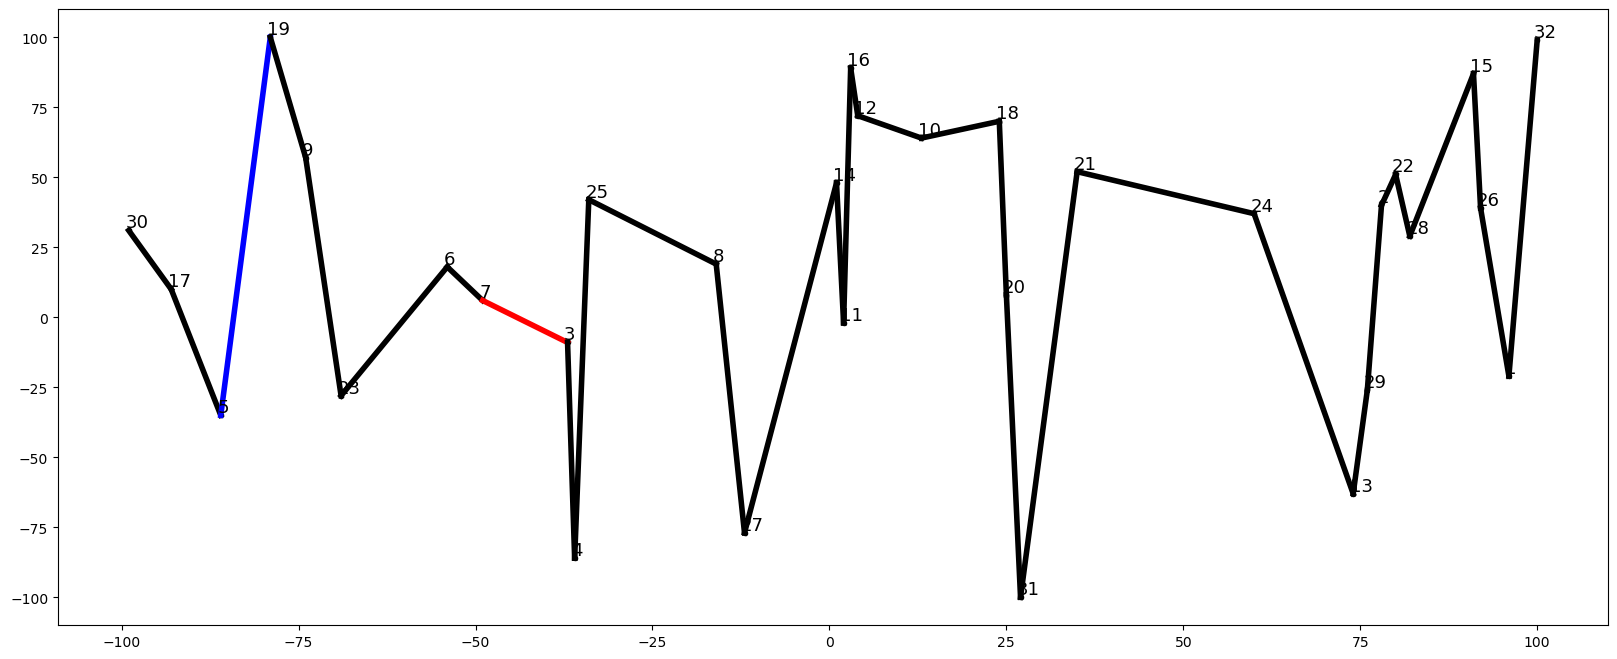

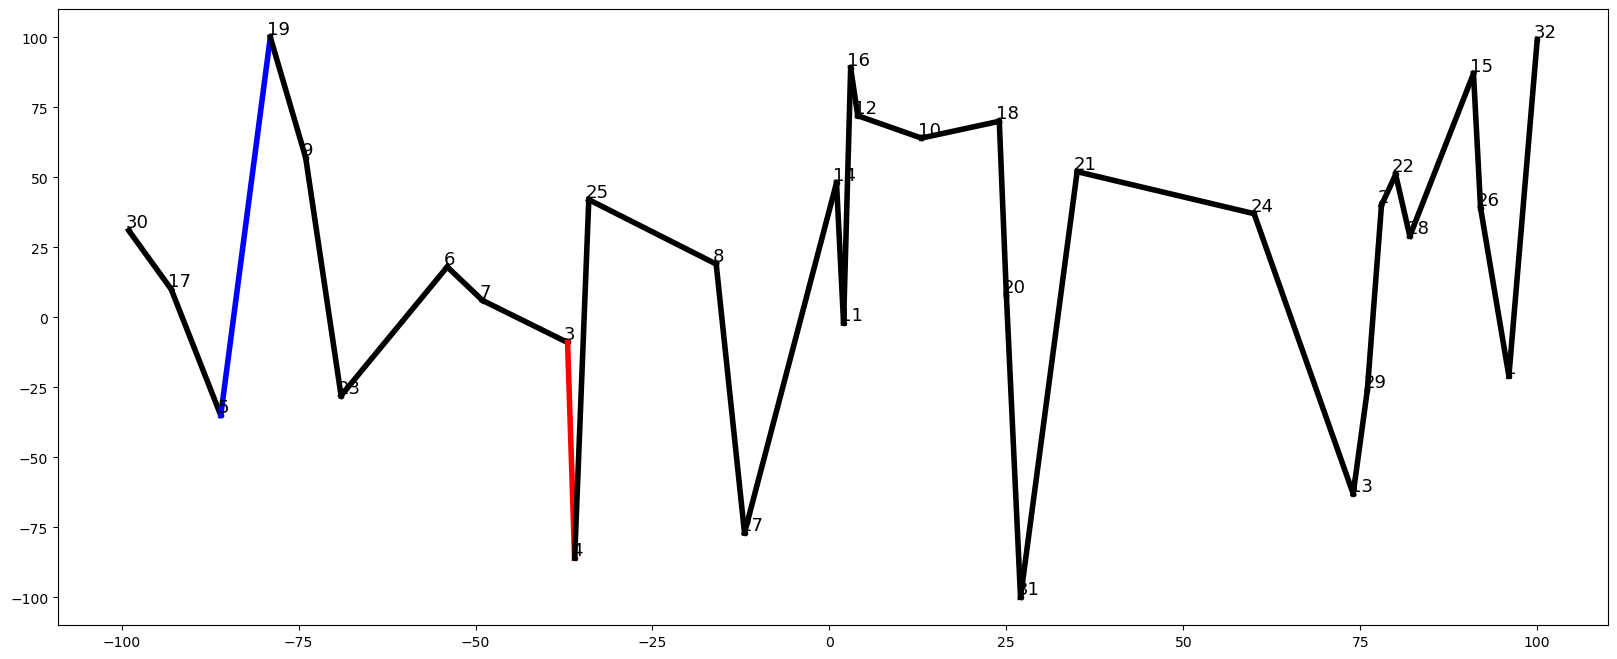

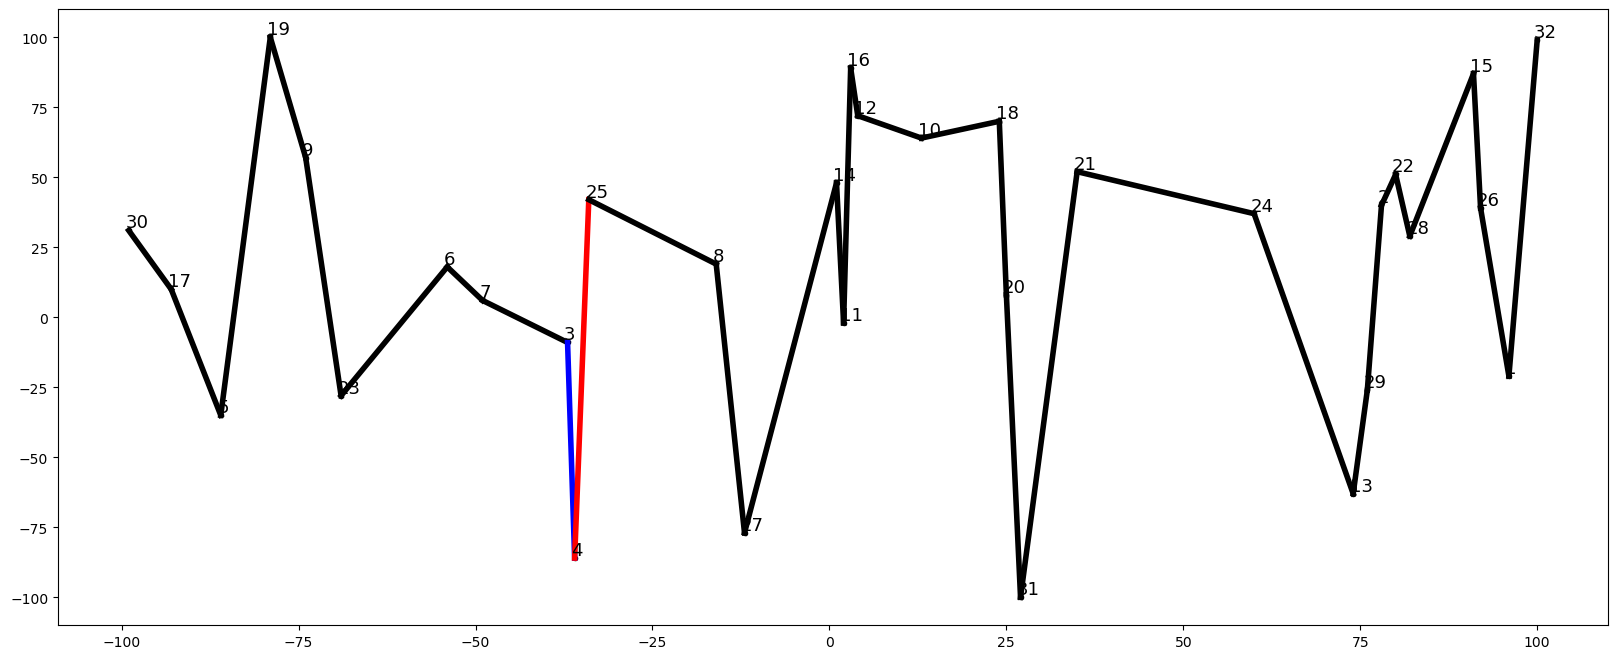

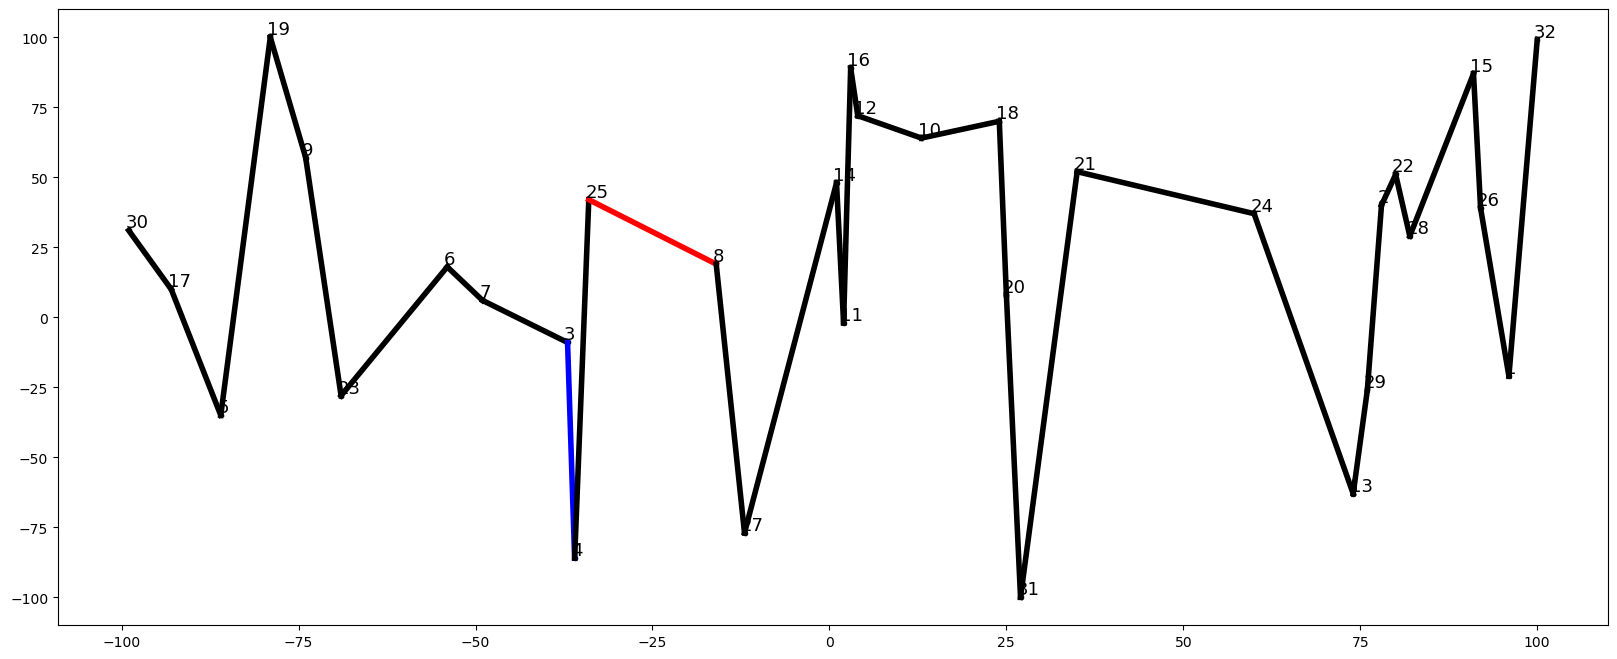

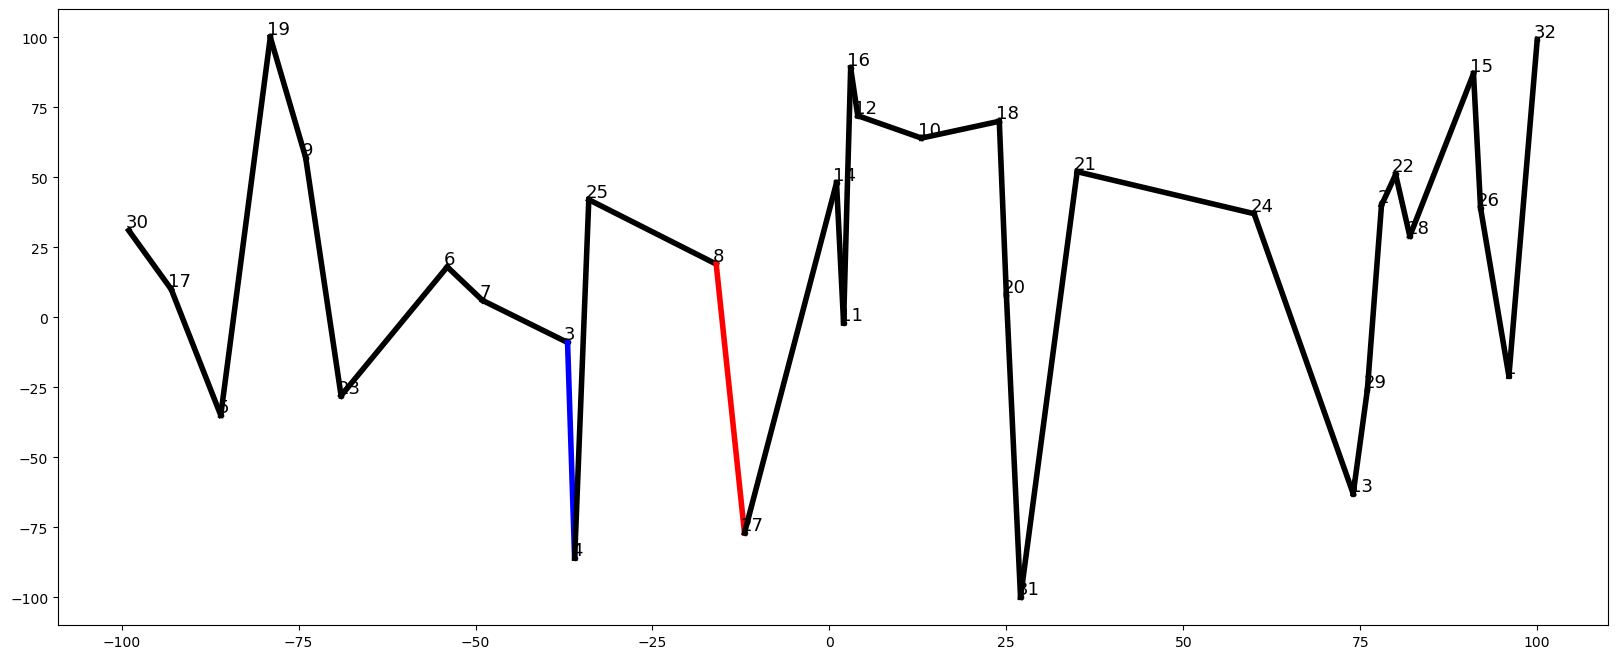

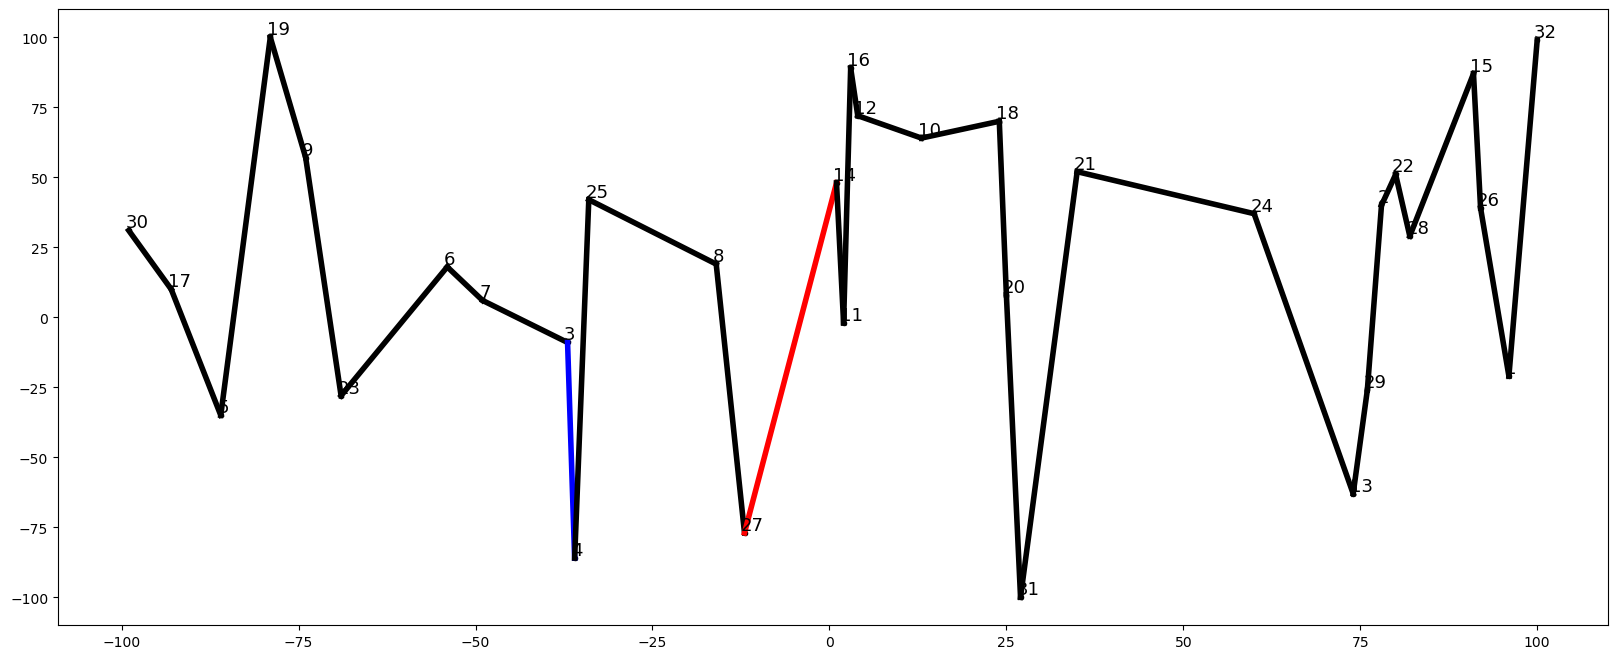

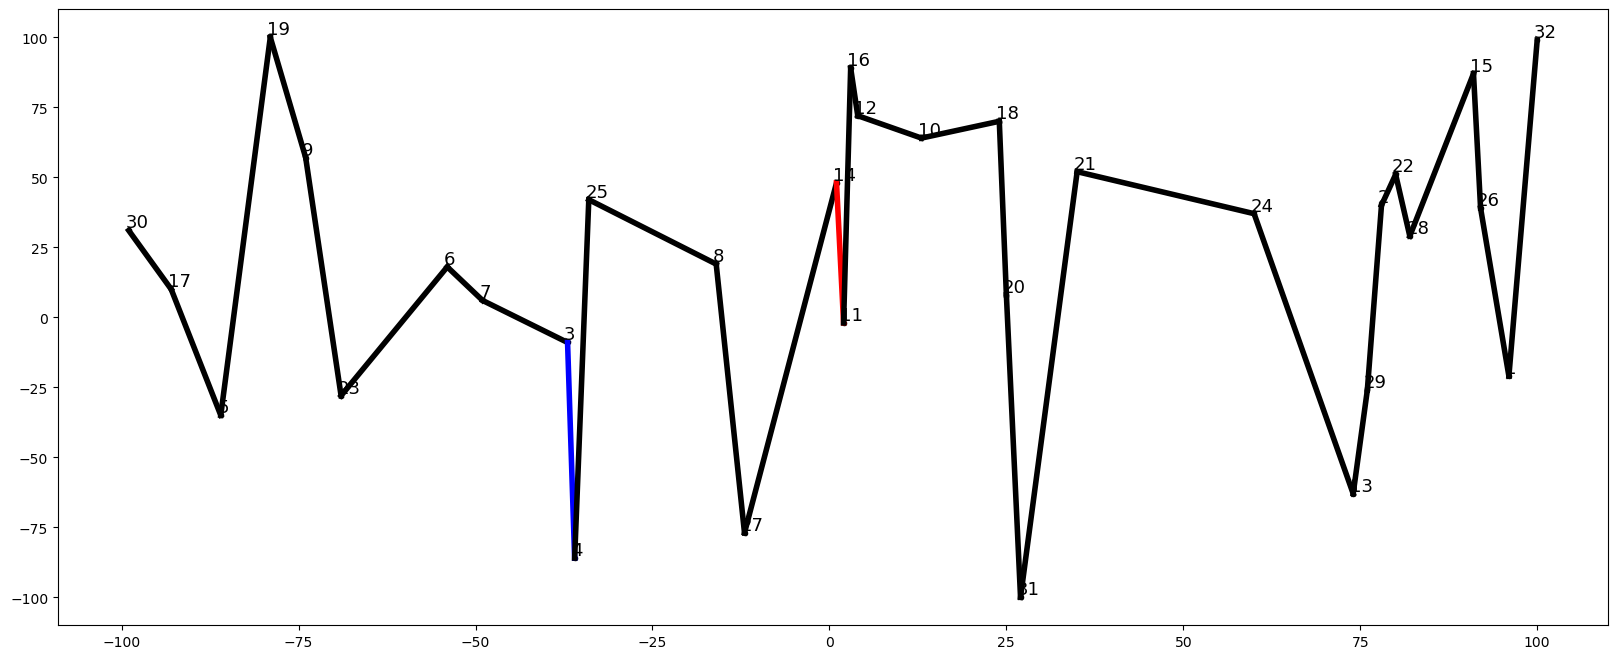

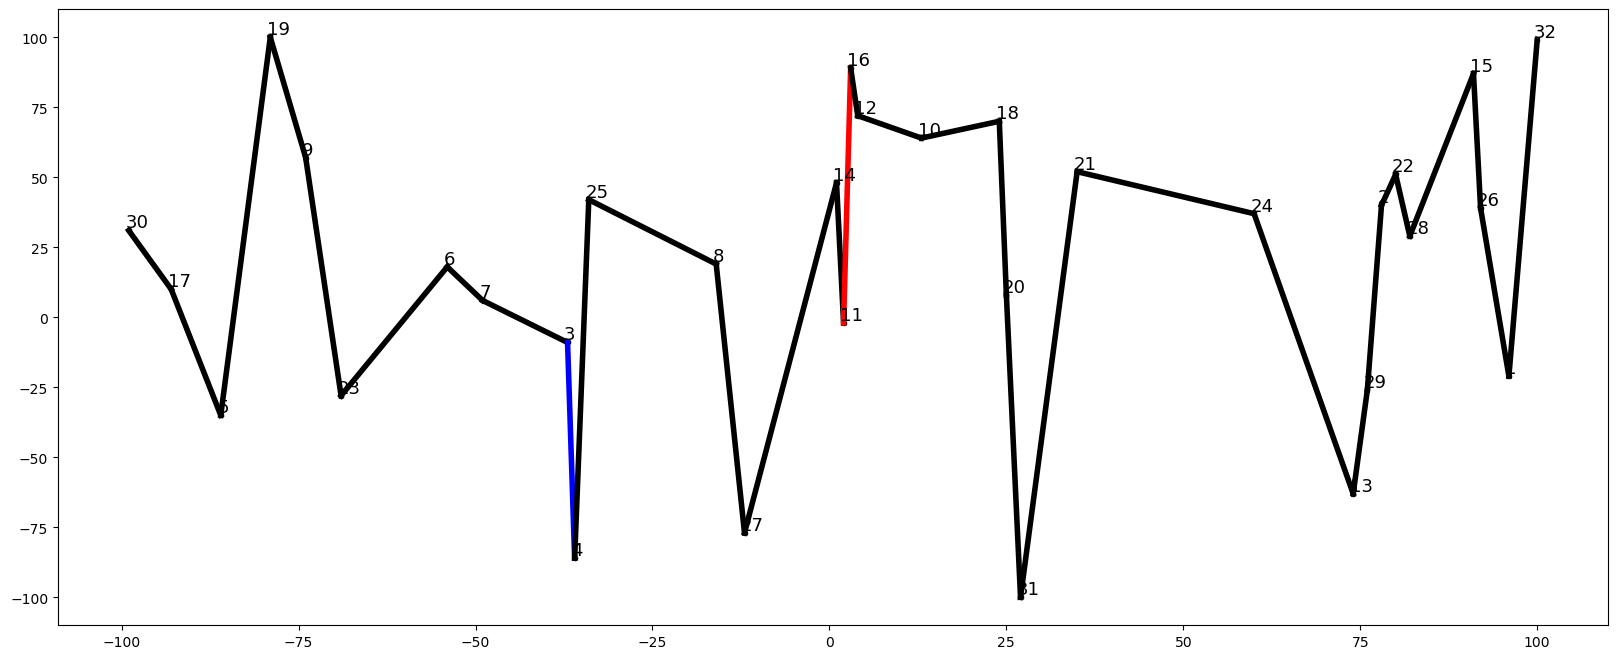

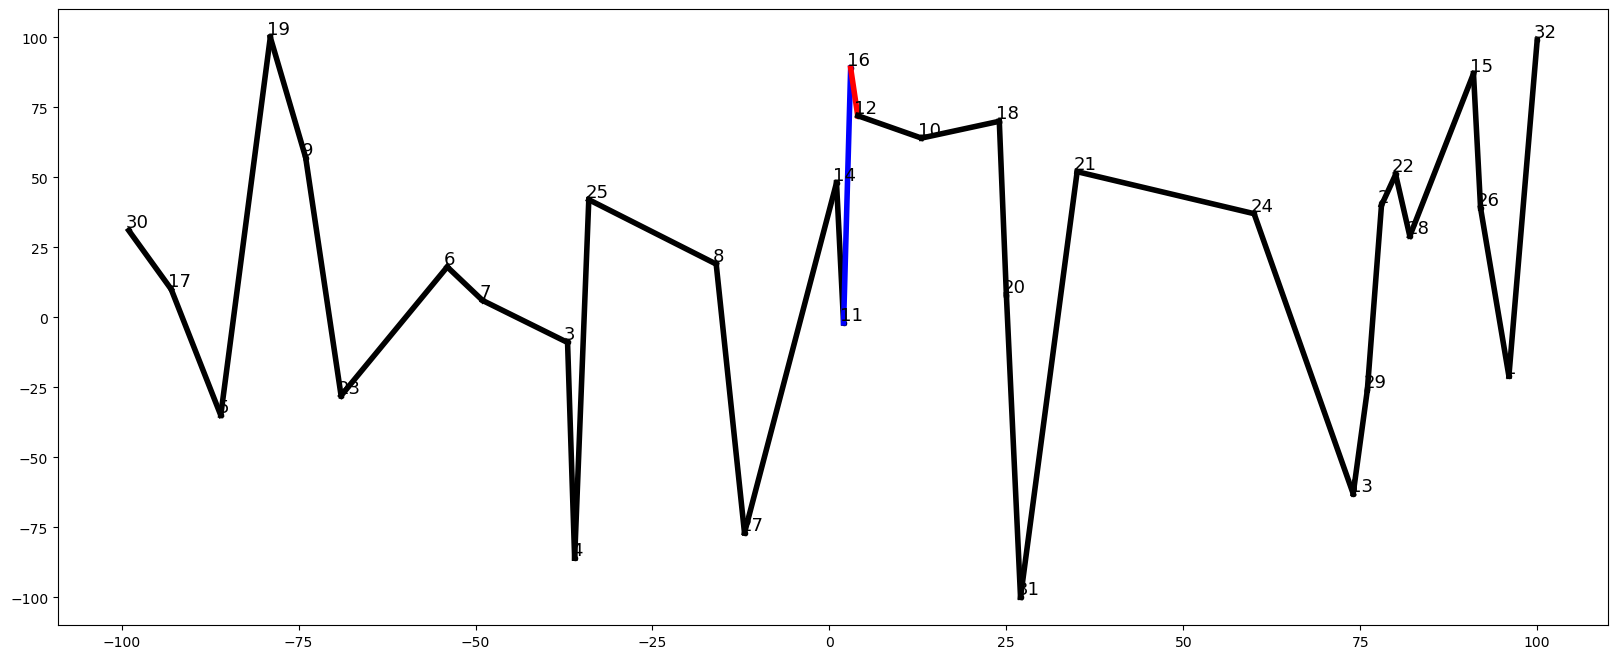

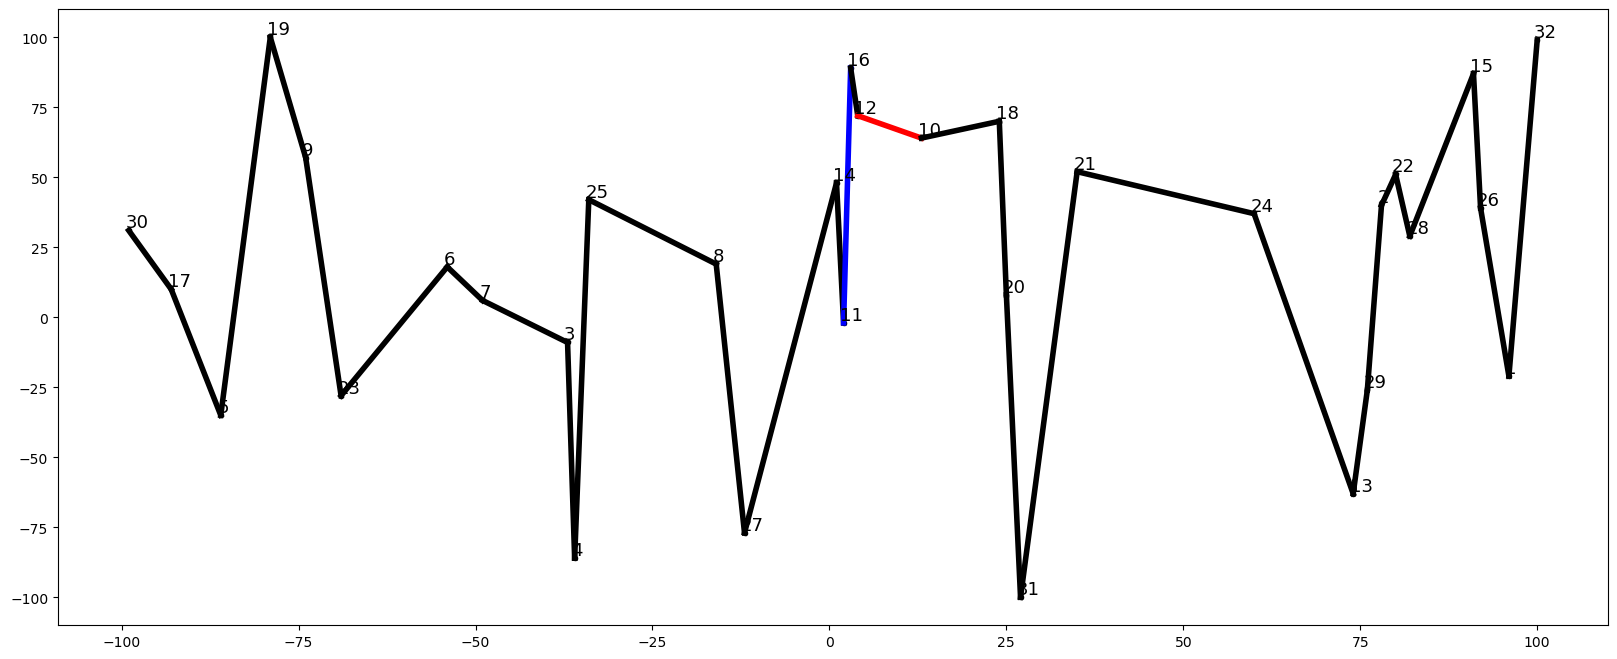

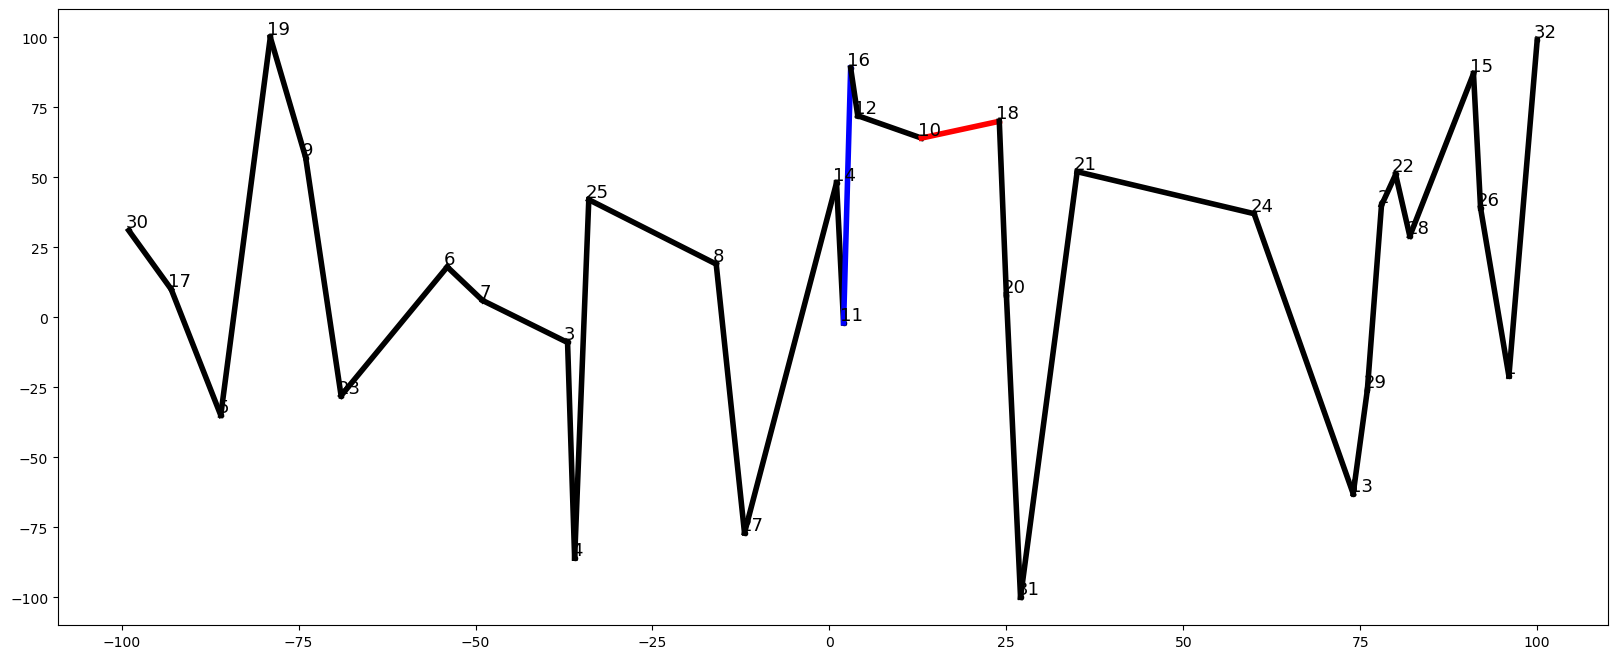

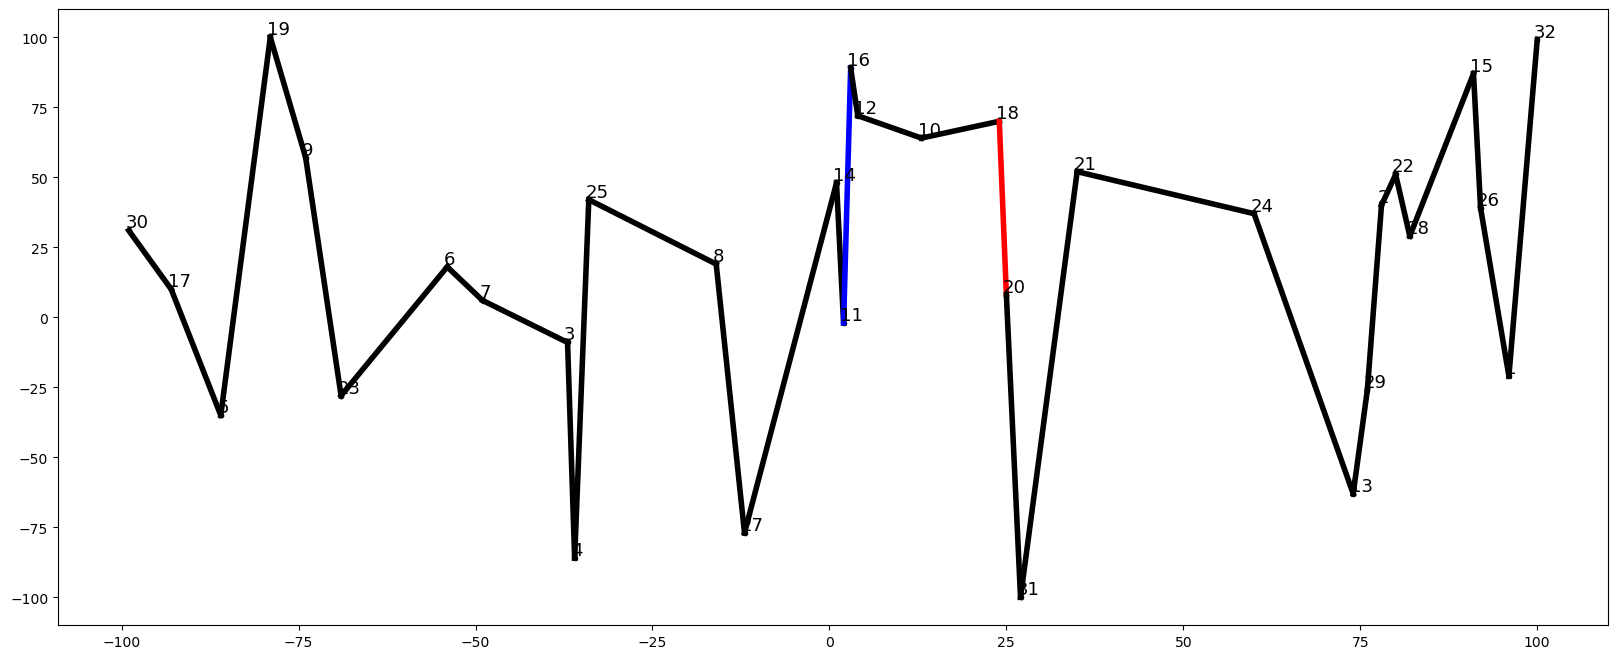

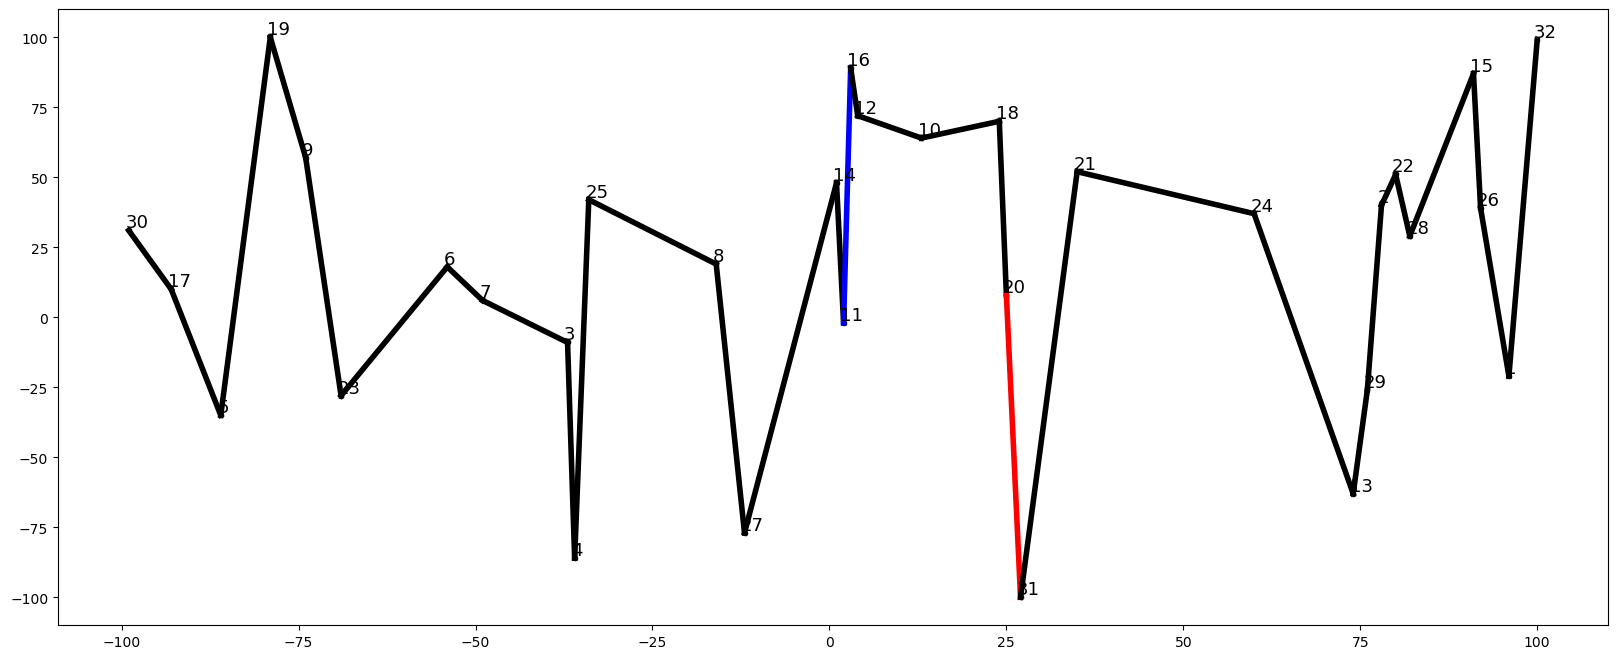

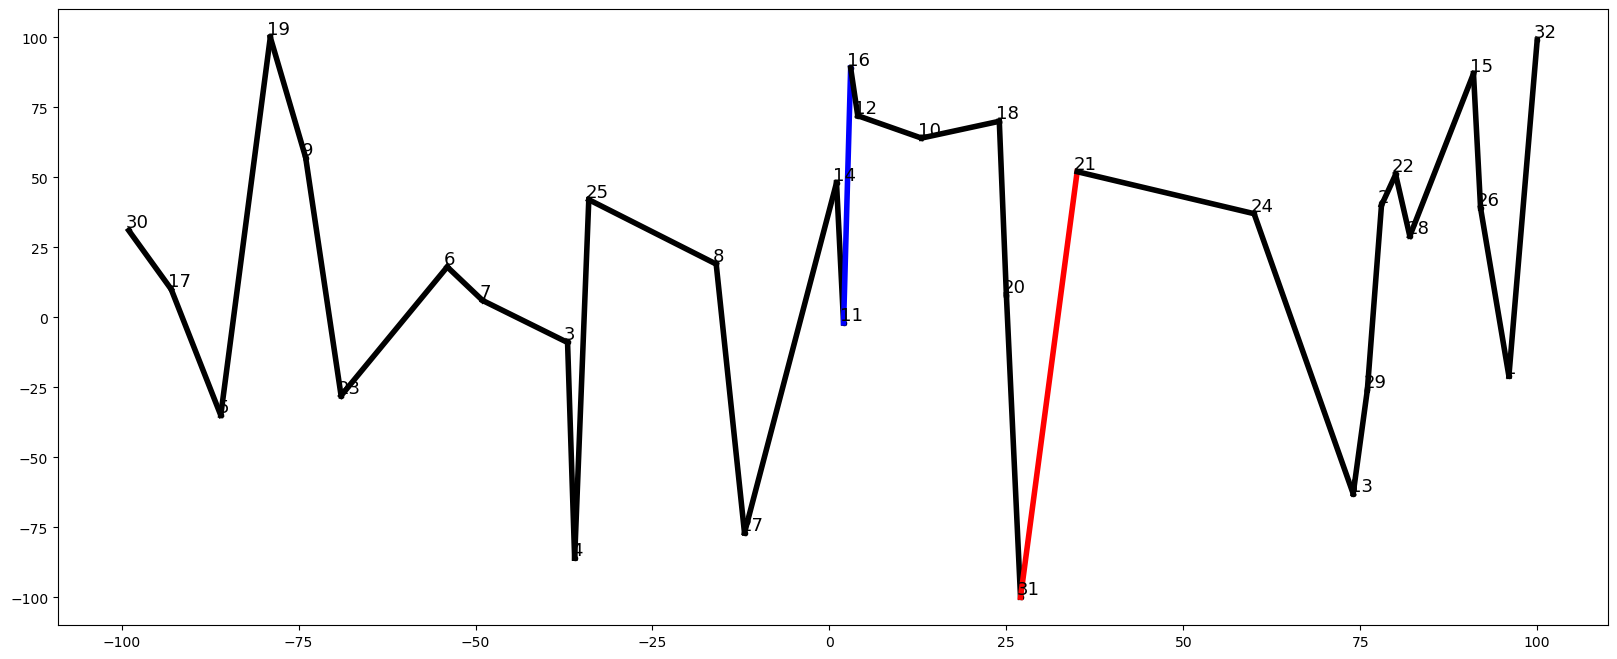

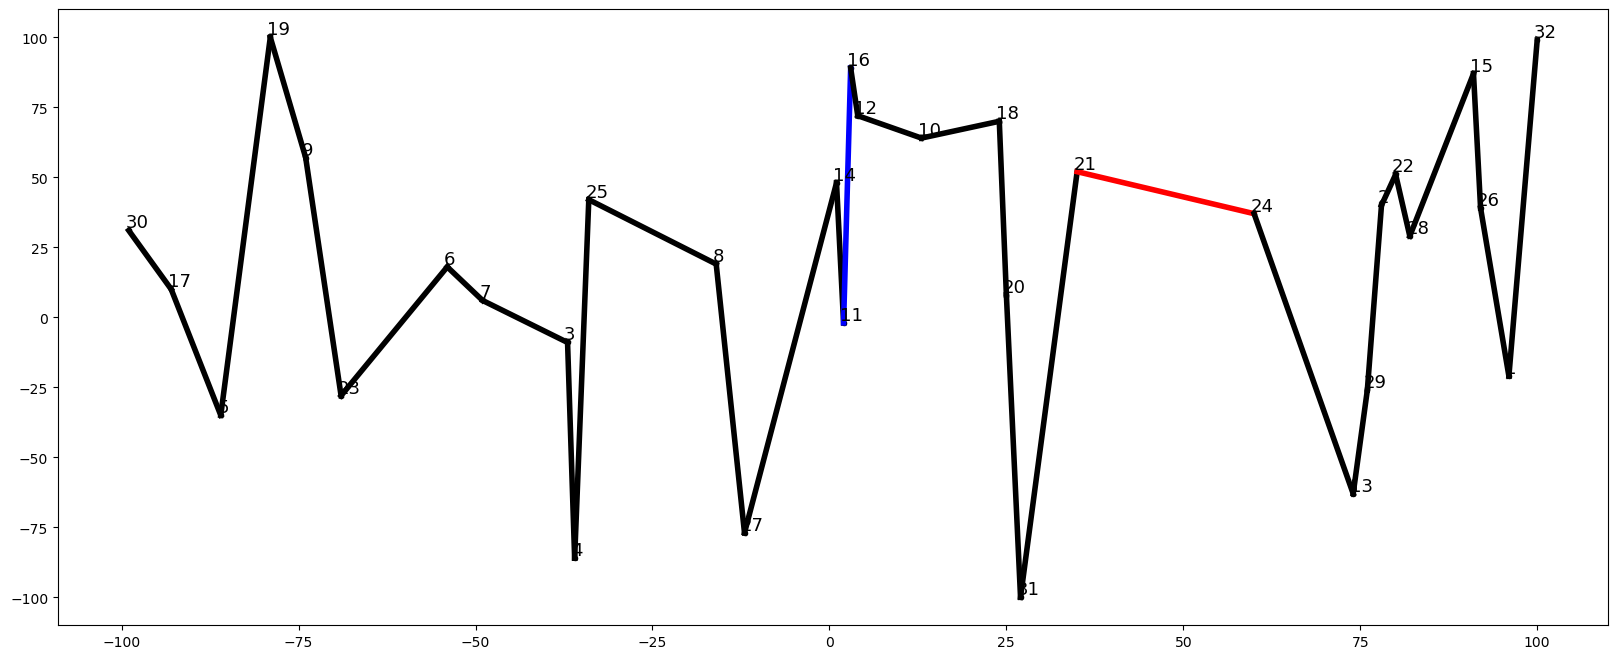

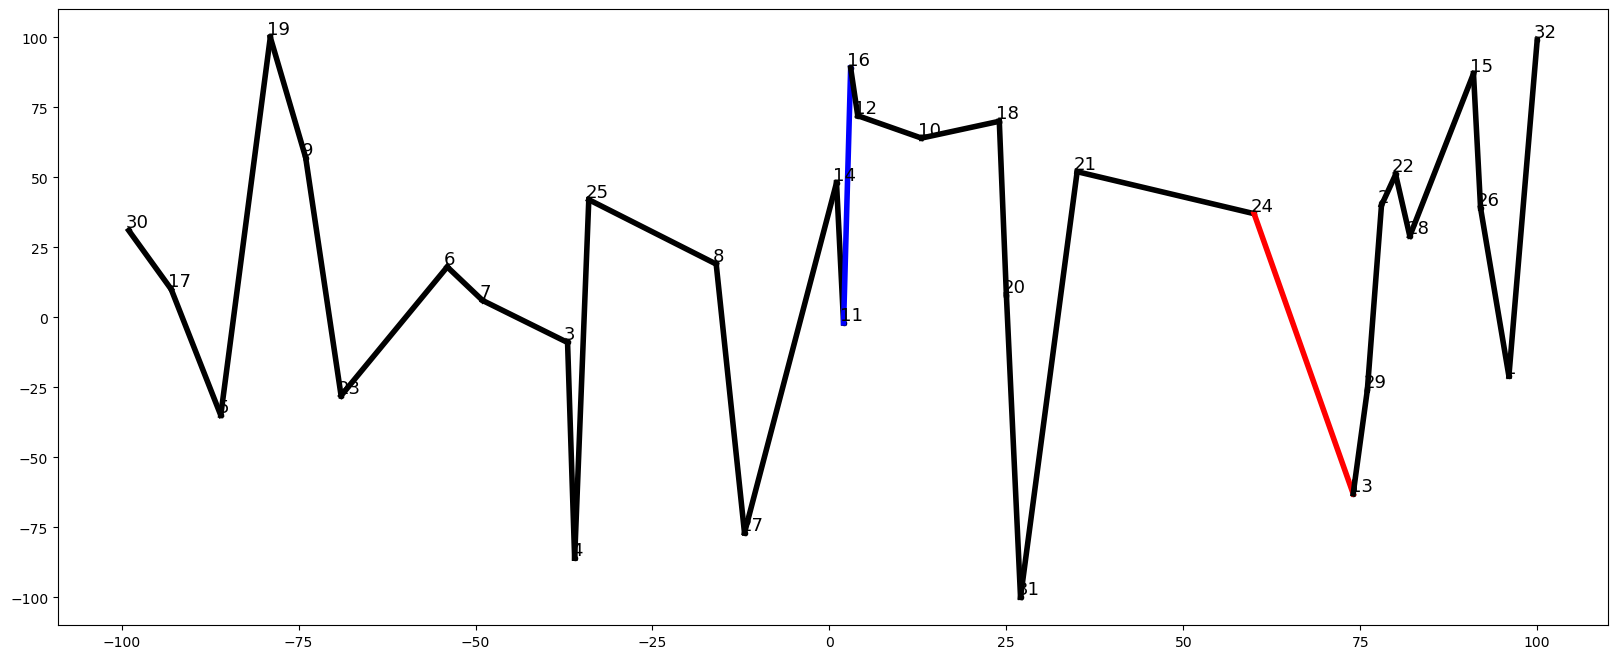

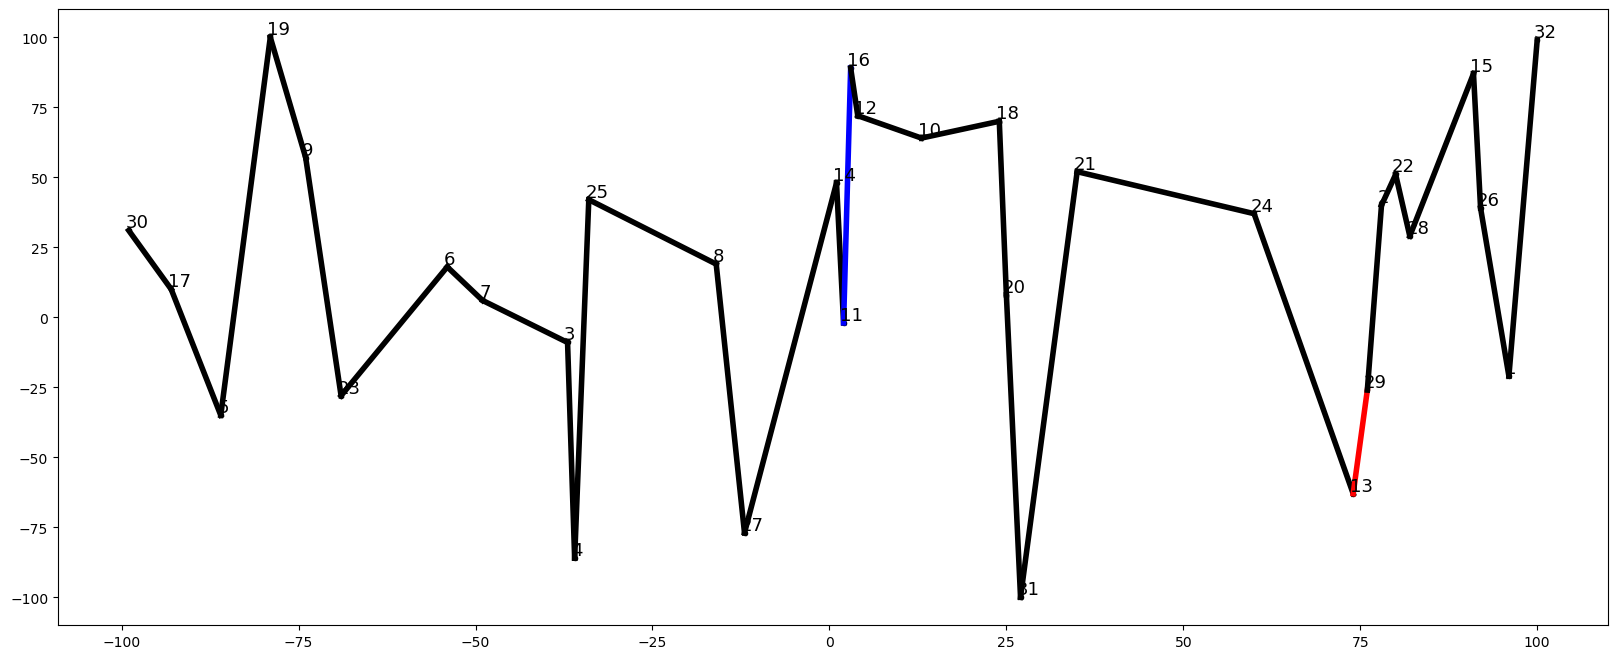

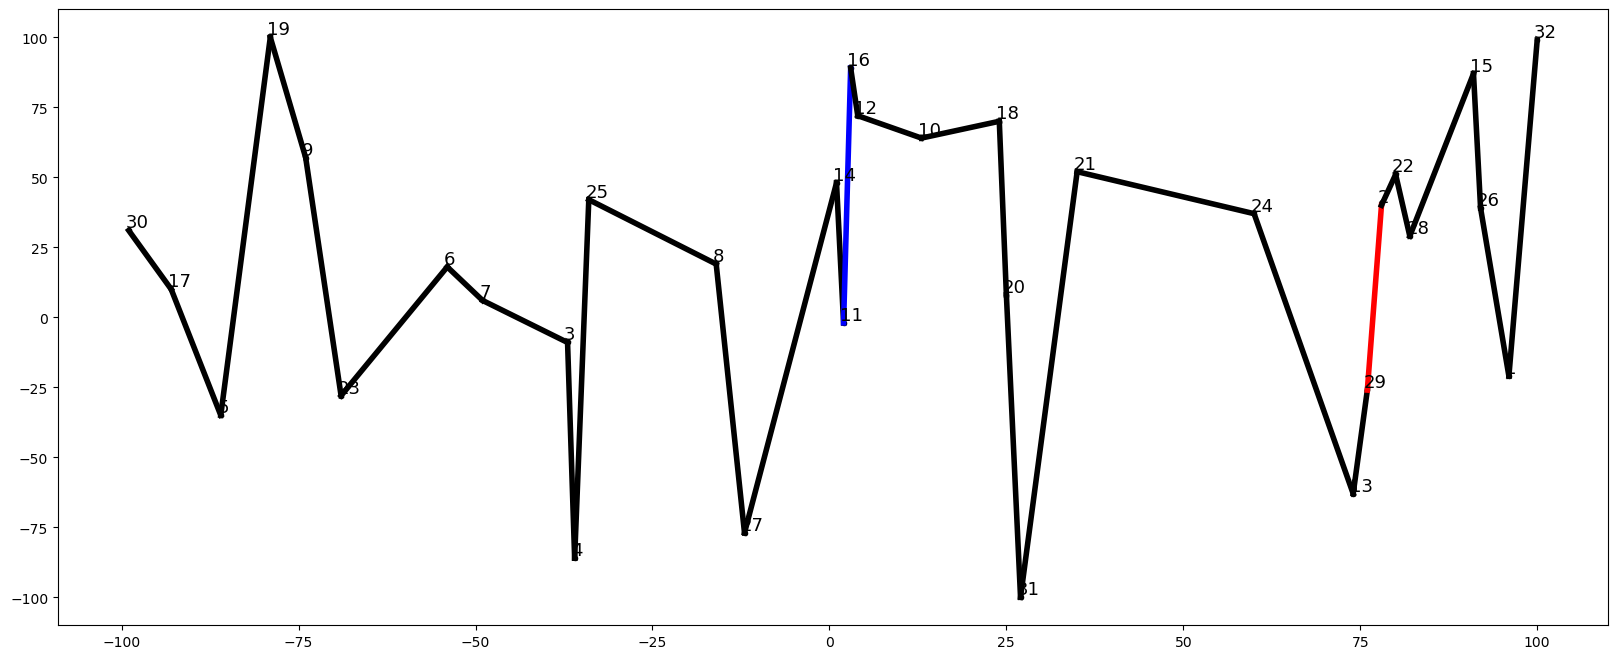

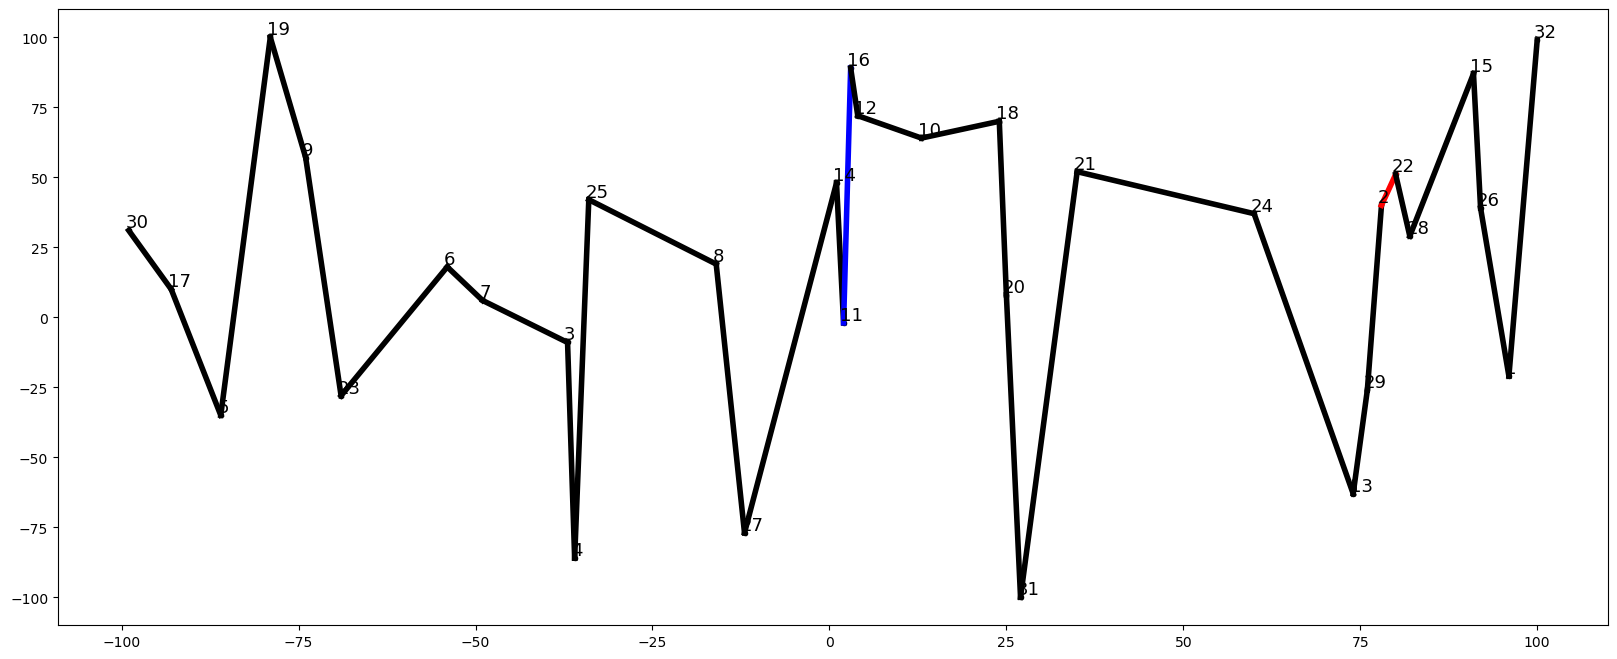

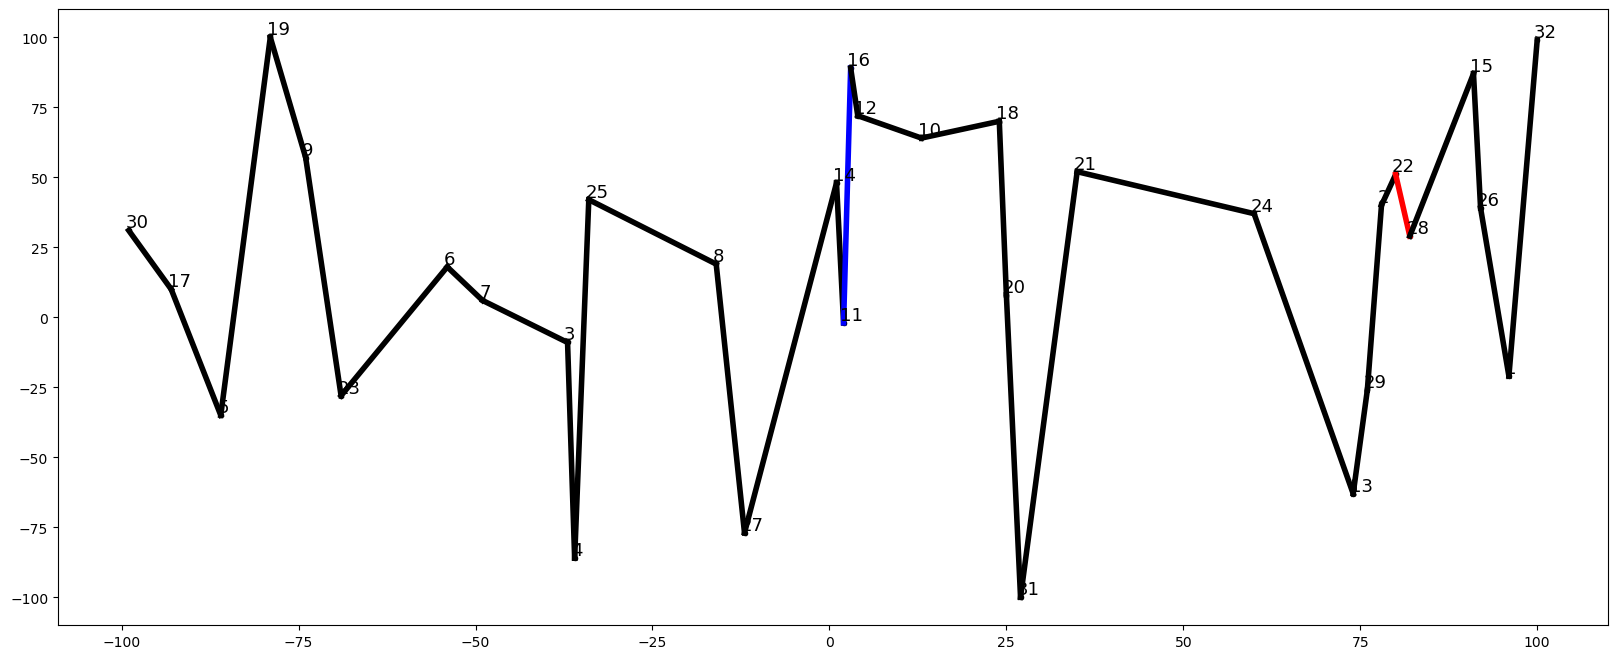

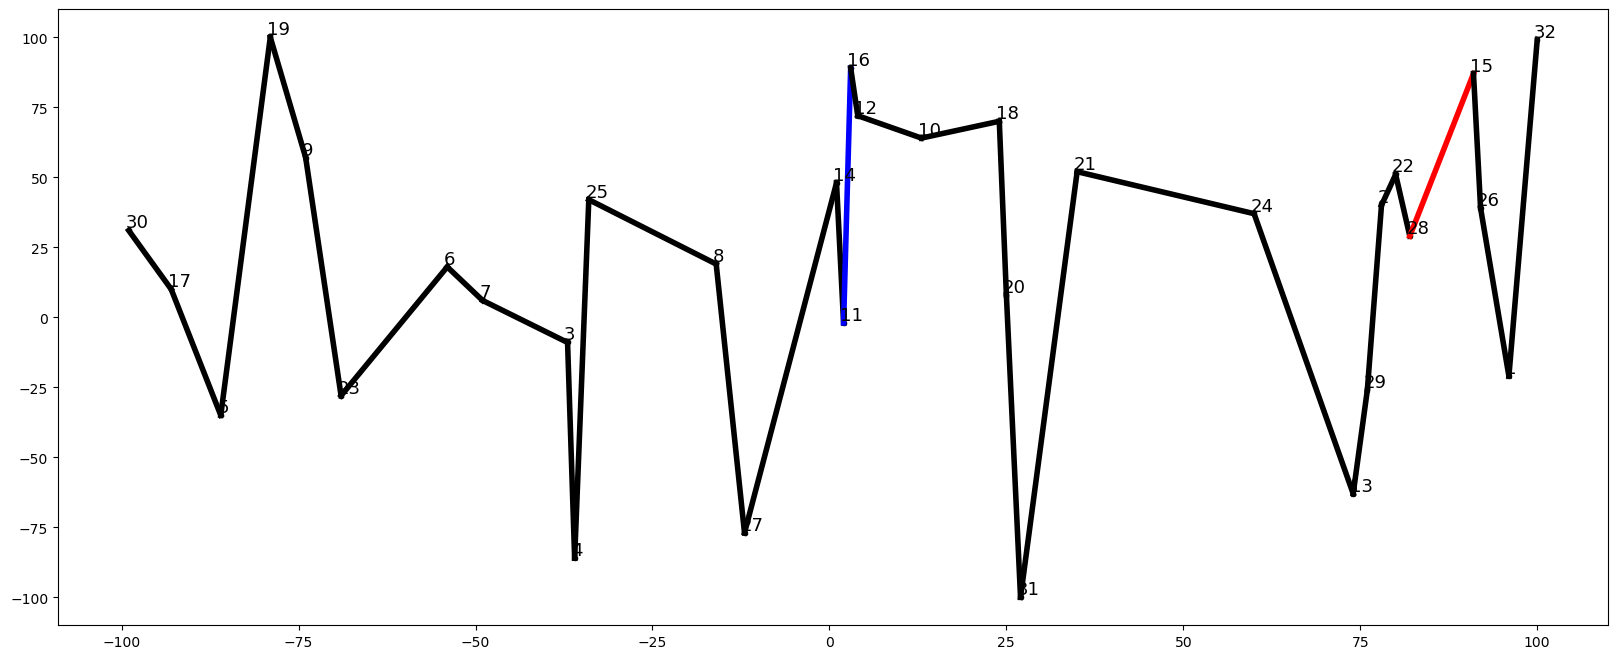

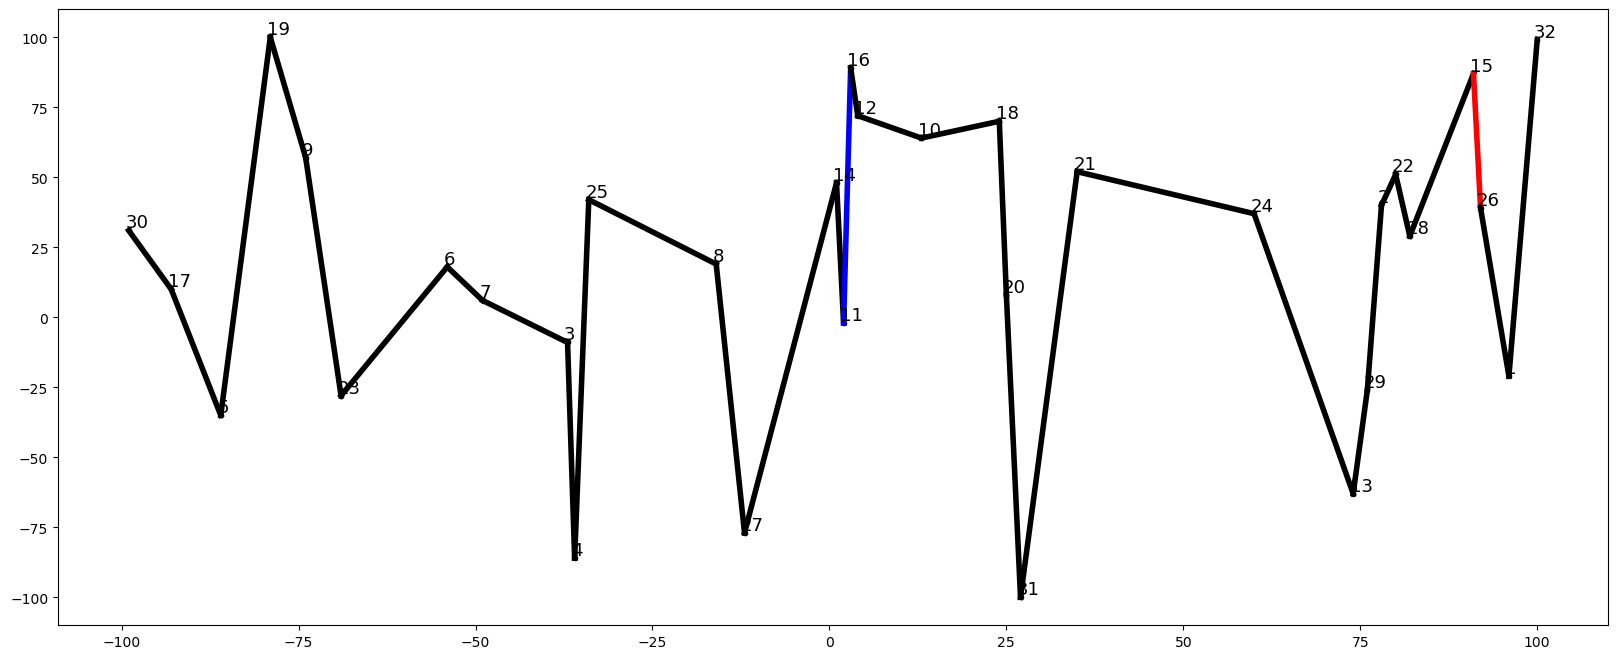

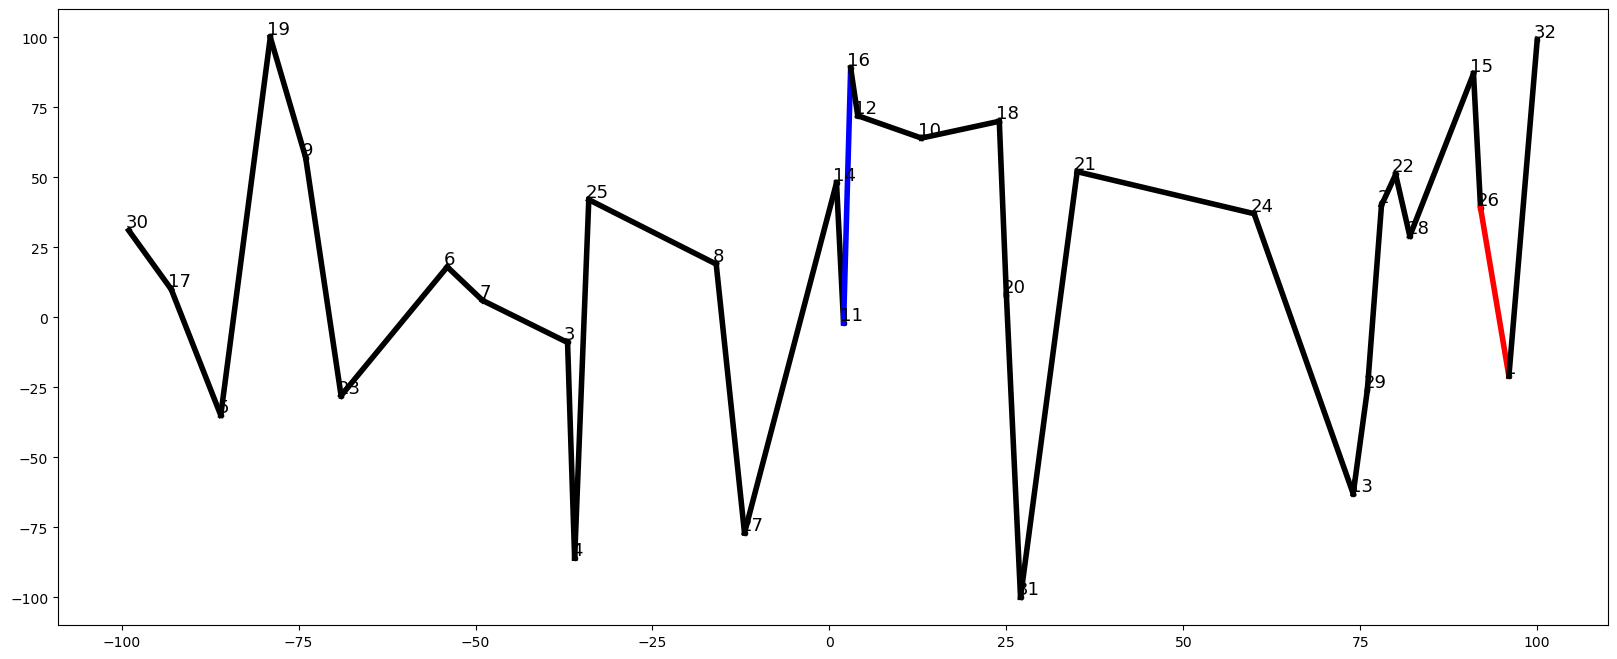

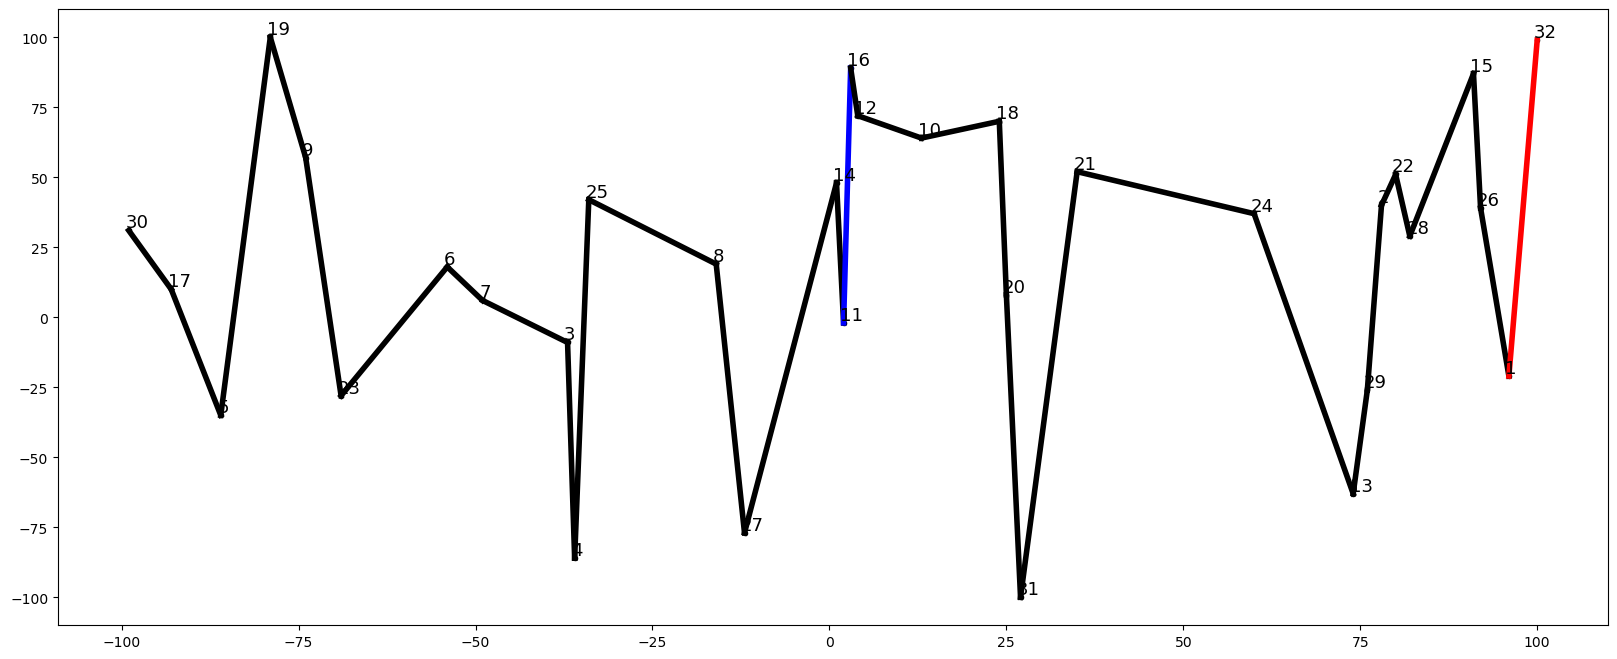

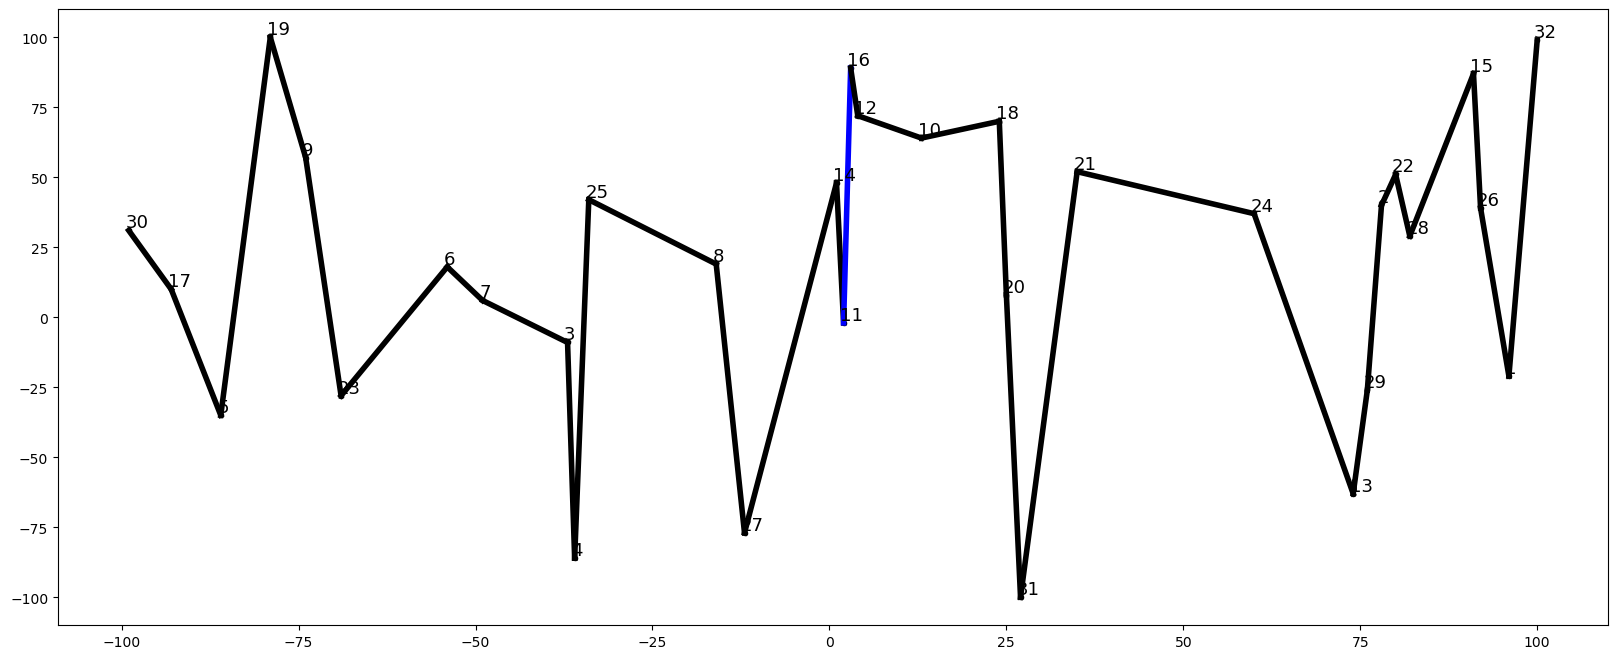

In [2]:
# N = int(input())
# idxs = [list(map(int, input().split())) for _ in range(N)]

# N = 5
# idxs = [[1, 1, 1], [6, 5, 2], [4, 7, 3], [3, 9, 4], [2, 10, 5]]

N = random.randint(30, 40)
idxs = [[] for _ in range(N)]

rand_xs = random.sample(range(-100, 101), N)
rand_ys = random.sample(range(-100, 101), N)

for i in range(N):
    idxs[i] = [rand_xs[i], rand_ys[i], i]

# N = 4
# idxs = [[-1, 1, 1], [2, 2, 2], [0, 0, 3], [5, 5, 4]]

idxs.sort(key=lambda x:x[0])

max_incline = 0
max_A = 0
max_B = 1
max_i = 0
max_check = []
colors = ['k-' for _ in range(N-1)]

for i in range(0, N):
    plt.figure(figsize =(20, 8))
    plt.xlim(min([idx[0] for idx in idxs]) - 10, max([idx[0] for idx in idxs]) + 10)
    plt.ylim(min([idx[1] for idx in idxs]) - 10, max([idx[1] for idx in idxs]) + 10)

    plt.plot([idx[0] for idx in idxs], [idx[1] for idx in idxs], 'k.')
    for idx in idxs:
        plt.text(idx[0]-0.5, idx[1]+1, idx[2]+1, fontsize=13)
    
    if i != N-1:
        colors[i] = 'r-'
    
    for j in range(0, N-1):
        plt.plot([idxs[j][0], idxs[j+1][0]], [idxs[j][1], idxs[j+1][1]], colors[j], linewidth=4)
        
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    sleep(0.2)
    
    if i == N-1:
        break
        
    incline = (idxs[i+1][1] - idxs[i][1])/(idxs[i+1][0] - idxs[i][0])
        
    if abs(incline) > abs(max_incline):
        
        for check in max_check:
            colors[check] = 'k-'
        max_check = []
        
        max_incline = incline
        max_A = min([idxs[i + 1][2], idxs[i][2]])
        max_B = max([idxs[i + 1][2], idxs[i][2]])
        max_i = i + 1
        
        max_check.append(i)
        
        colors[i] = 'b-'
    
    elif abs(incline) == abs(max_incline):
        if incline == max_incline and max_i == i:
            candid_vec = list({max_A, max_B, idxs[i][2], idxs[i+1][2]})
            sort(candid_vec)
            max_A = candid_vec[0]
            max_B = candid_vec[1]
            
            for check in max_check:
                colors[check] = 'k-'
            max_check = []
            
            for j in range(len(idxs)):
                if idxs[j][2] == max_A or idxs[j][2] == max_B:
                    colors[j] = 'b-'
                    max_check.append(j)
            
        elif idxs[i][2] < max_A or \
            idxs[i+1][2] or \
            (idxs[i][2] == max_A and idxs[i + 1][2]<max_B) \
            or (idxs[i + 1][2] == max_A and idxs[i][2] < max_B):
            max_A = min(idxs[i+1][2], idxs[i][2])
            max_B = max(idxs[i+1][2], idxs[i][2])
            
            for check in max_check:
                colors[check] = 'k-'
            max_check = []
            
            colors[i] = 'b-'
            
    else:
        colors[i] = 'k-'
print(f'{max_A+1} {max_B+1}')

Text(2, 2, 'Incline : 1.67')

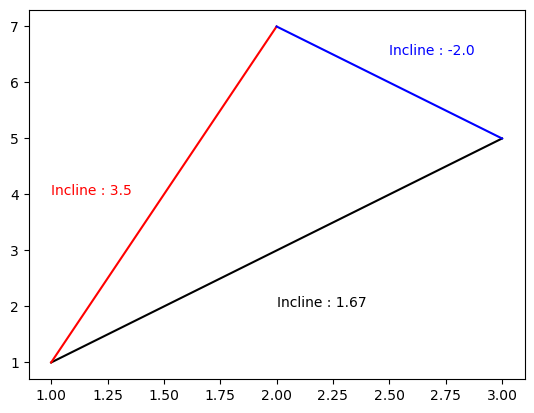

In [7]:
plt.plot([1, 3], [1, 5], 'k-')
plt.plot([1, 2], [1, 7], 'r-')
plt.plot([2, 3], [7, 5], 'b-')

plt.text(1, 4, f'Incline : {7/2}', color='red')
plt.text(2.5, 6.5, f'Incline : {-2/1}', color='blue')
plt.text(2, 2, f'Incline : {5/3:.2f}', color='black')

Text(1.75, 4, 'Incline : 2.0')

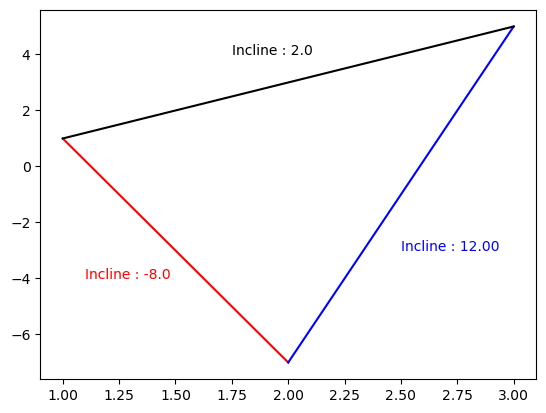

In [102]:
plt.plot([1, 2], [1, -7], 'r-')
plt.plot([2, 3], [-7, 5], 'b-')
plt.plot([1, 3], [1, 5], 'k-')

plt.text(1.1, -4, f'Incline : {-8/1}', color='red')
plt.text(2.5, -3, f'Incline : {12/1:.2f}', color='blue')
plt.text(1.75, 4, f'Incline : {4/2}', color='black')

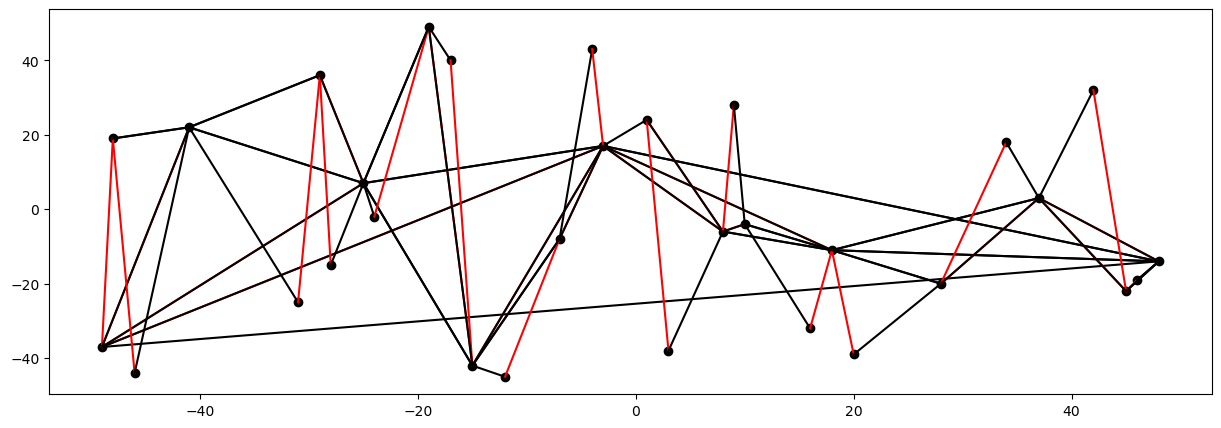

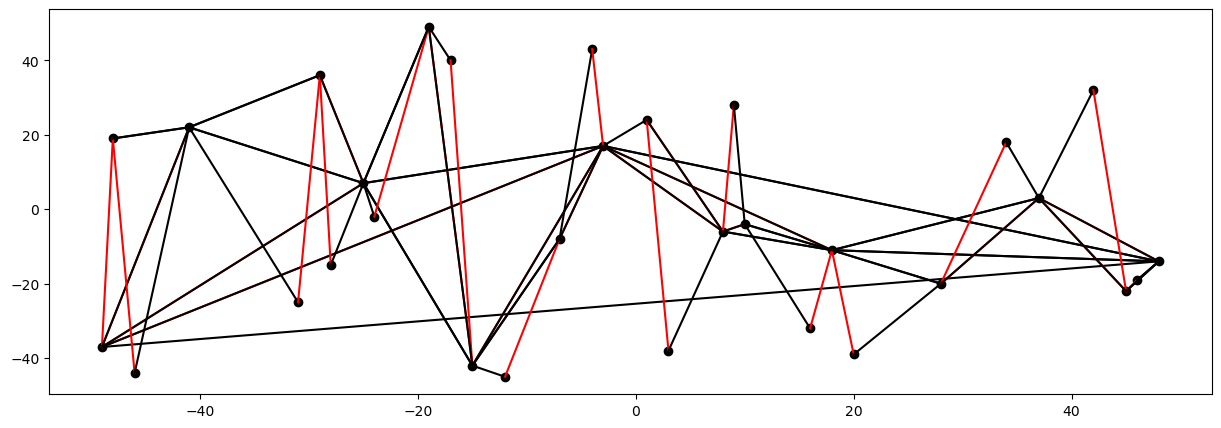

In [9]:
N = random.randint(30, 40)
if not N%2:
    N += 1
    
idxs = [[] for _ in range(N)]

xs = random.sample(range(-50, 51), N)
ys = random.sample(range(-50, 51), N)

for i in range(N):
    idxs[i] = [xs[i], ys[i], i+1]
    
idxs.sort(key=lambda x: x[0])

plt.figure(figsize=(15, 5))
plt.plot([idx[0] for idx in idxs], [idx[1] for idx in idxs], 'ko')


queue = deque([[0, N-1]])

while queue:
    
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    sleep(1)
    
    start, end = queue.popleft()
    half = (start + end) // 2

    x_s, y_s, n_s = idxs[start]
    x_h, y_h, n_h = idxs[half]
    x_e, y_e, n_e = idxs[end]

    inclines = [abs((y_s - y_h) / (x_s - x_h)), abs((y_h - y_e) / (x_h - x_e)), abs((y_s - y_e) / (x_s - x_e))]
    max_incline = max(inclines)
    
    for i in range(3):
        if inclines[i] == max_incline:
            if i == 0:
                plt.plot([x_s, x_h], [y_s, y_h], 'r-')
            elif i == 1:
                plt.plot([x_h, x_e], [y_h, y_e], 'r-')
            else:
                plt.plot([x_s, x_e], [y_s, y_e], 'r-')
        else:
            if i == 0:
                plt.plot([x_s, x_h], [y_s, y_h], 'k-')
            elif i == 1:
                plt.plot([x_h, x_e], [y_h, y_e], 'k-')
            else:
                plt.plot([x_s, x_e], [y_s, y_e], 'k-')
    
    if half - start >= 2:
        queue.append([start, half])
    if end - half >= 2:
        queue.append([half, end])
    
display.clear_output(wait=True)
display.display(plt.gcf()) 
sleep(1)